<a href="https://colab.research.google.com/github/DGkurnia/discuss1/blob/main/airquality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** [Derfansyah Guswiranata Kurnia]
- **Email:** [weerakurnia@gmail.com]
- **ID Dicoding:** [dgkurnia]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana kondisi suhu di dua belas kota dari tahun 2013 samapai 2017 ?
- Pertanyaan 2 : Bagaimana pemeriksaan ukuran partikuler (untuk PM 2.5 dan PM 10) di dua belas kota dari tahun 2013 sampai 2017 ?.
- Pertanyaan 3 : Bagaimana pemeriksaan kadar sulfur dioksida (SO2), kadar nitrogen monoksida (NO) dan karbon monoksida (CO) di dua belas kota dari tahun 2013 sampai 2017 ?.
- Pertanyaan 4 : Bagaimana pemeriksaan kondisi gas ozon dari tahun 2013 sampai 2017 ?.

## Impor Semua Paket/Library yang Digunakan
Kumpulan perpustakaan Python yang dipakai untuk proyek:


In [8]:
from google.colab import drive
drive.mount('/content/drive') #dasar instalasi file dari Google Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
#persiapan perpustakaan dan file untuk pembersihan
import numpy as np
import pandas as pd #dasar pengelolaan data
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime # dasar pengelolaan data berbasis waktu
from scipy.interpolate import interp1d #interpolasi linear
from scipy.stats import skew #pemeriksaan kecendrungan dari histogram
import plotly.express as px #kecendrungan dari plot kotak

## Tahap 'Data Wrangling'
Pada tahap ini, jumlah dataframe yang akan dianalisis adalah 12 unit

In [10]:

#persiapan insersi data
dfaotizhongxin = pd.read_csv('/content/drive/MyDrive/csv-files/aqins/aotizhongxin.csv')
dfchangping = pd.read_csv('/content/drive/MyDrive/csv-files/aqins/changping.csv')
dfdingling = pd.read_csv('/content/drive/MyDrive/csv-files/aqins/dingling.csv')
dfdongsi = pd.read_csv('/content/drive/MyDrive/csv-files/aqins/dongsi.csv')
dfguanyuan = pd.read_csv('/content/drive/MyDrive/csv-files/aqins/guanyuan.csv')
dfgucheng = pd.read_csv('/content/drive/MyDrive/csv-files/aqins/gucheng.csv')
dfhuairou = pd.read_csv('/content/drive/MyDrive/csv-files/aqins/huairo.csv')
dfnonzhanguan = pd.read_csv('/content/drive/MyDrive/csv-files/aqins/nonzhanguan.csv')
dfshunyi = pd.read_csv('/content/drive/MyDrive/csv-files/aqins/shunyi.csv')
dftiantan = pd.read_csv('/content/drive/MyDrive/csv-files/aqins/tiantan.csv')
dfwanliu = pd.read_csv('/content/drive/MyDrive/csv-files/aqins/wanliu.csv')
dfwanshouxigong = pd.read_csv('/content/drive/MyDrive/csv-files/aqins/wanshouxigong.csv')
"""
Kota awal adalah Aotizhungxin dan kota akhir adalah Wanshouxigong
"""

'\nKota awal adalah Aotizhungxin dan kota akhir adalah Wanshouxigong\n'

### Tahap Pengumpulan (Gathering Data)
#### rincian dari pengumpulan data : ada 12 dataset kota yang terdiri dari
* Nomor
* Tahun
* Bulan
* Jam
* kadar partikulat (PM 2.5 dan 10)
* kadar senyawa SO2, NO, CO, dan O3 (dalam mikrogram/ m^3)
* tempratur (dalam celsius)
* Nilai tekanan (dalam hektoPascal)
* arah angin dan kecepatan angin
-- Nilai Tahun, bulan dan jam bisa diubah menjadi tanggal.


In [11]:
"""
pemeriksaan data dari data kurang lengkap untuk enam kota pertama :
(kota Aotizhongxin sampai Huairo)
"""

#dfaotizhongxin.info()
#dfaotizhongxin.isnull().sum()
#dfaotizhongxin.duplicated().sum() # kota Aotizhongxin
#dfchangping.info()
#dfchangping.isnull().sum()
#dfchangping.duplicated().sum() # Changping
#dfdongsi.isnull().sum()
#dfdongsi.duplicated().sum()
#dfdingling.info()
#dfdingling.isnull().sum()
#dfdingling.duplicated().sum() #Dingling


'\npemeriksaan data dari data kurang lengkap untuk enam kota pertama :\n(kota Aotizhongxin sampai Huairo)\n'

## Rincian dataset
(urutan data dari awal sampai akhir)
*   kode 'dfaotizhongxin' untuk dataframe di Kota Aotizhongxin
*   kode 'dfchangping' untuk dataframe di Kota Changping
* kode 'dfdingling' untuk dataframe di Kota Dingling
* kode 'dfguanyuan' untuk dataframe di kota Guanyuan
* kode 'dfgucheng' untuk dataframe di kota Gucheng
* kode 'dfhuairou' untuk dataframe di kota Huairo (pengucapan cina 'Huairo' adalah 'Huairou')
*kode 'dfnonzhanguan' untuk dataframe di kota Nonzhanguan
* kode 'dfshunyi' untuk dataframe di kota Shunyi
* kode 'dftiantan' untuk dataframe di kota Tiantan
* kode 'dfwanliu' untuk untuk dataframe di kota Wanliu
* kode 'dfwanshouxigong' untuk untuk dataframe di kota Wanshouxigong

### Tahap 'Assessing Data'
#### Hal yang diperhatikan dalam pemeriksaan kadar udara
- Total data duplikat
-- Aotizhongxin : tidak ada
-- Changpin : Tidak ada
- Jumlah data hilang di masing-masing unit
-- Kota Aotizhingxin : 925 data di PM2.5, 718 di PM 10. Tiga kolom memiliki data kosong di atas 500
-- Kota Changpin : banyak data hilang berada di pemeriksaan empat gas tersebut
-- Kota lain memiliki kecendrungan untuk memiliki data kosong di kondisi tersebut
  
##**Hal unik lain**

Forrmat tanggal yang salah (awalnya tahun, bulan, hari, dan jam) yang dipisah

In [12]:
"""
pemeriksaan data dari data kurang lengkap untuk enam kota terakhir :
(kota Nonzhanguan sampai Wanshouxigong)
"""

dfnonzhanguan.info()
dfnonzhanguan.isnull().sum()
dfnonzhanguan.duplicated().sum() #Nonzhanguan

#Wanshouxigong
dfwanshouxigong.duplicated().sum()
dfwanshouxigong.isnull().sum()
dfwanshouxigong.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34436 non-null  float64
 6   PM10     34624 non-null  float64
 7   SO2      34618 non-null  float64
 8   NO2      34372 non-null  float64
 9   CO       33858 non-null  float64
 10  O3       34558 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 t

### Proses Pembersihan (Cleaning) Data
#### Pengantar : Data ini bisa dimanfaatkan untuk pengaturan sehingga proses yang sesuai untuk pembersihan data adalah interpolasi kolom indikator yang berangka demi menjaga aspek kolom yang hilang. Di sisi lain, pengisian data dengan modus berlaku untuk kolom non integer
Tahapan pembersihan data
(hal ini berlaku untuk 12 kota)
1.   Pengubahan format waktu dan menghapus format salah (Tahun, bulan, angka, dan jam)
2. Proses interpolasi untuk kolom hilang di indikator yang dibutuhkan
3. Pengisian nilai non numerik yang hilang




In [13]:
#pembersihan bagian pertama (pengubahan format data waktu) untuk dua belas kota
dfaotizhongxin['datetime'] = dfaotizhongxin[['year', 'month', 'day', 'hour']].apply(lambda x: datetime(*x), axis=1)
dfchangping['datetime'] = dfchangping[['year', 'month', 'day', 'hour']].apply(lambda x: datetime(*x), axis=1)
dfdingling['datetime'] = dfdingling[['year', 'month', 'day', 'hour']].apply(lambda x: datetime(*x), axis=1)
dfdongsi['datetime'] = dfdongsi[['year', 'month', 'day', 'hour']].apply(lambda x: datetime(*x), axis=1)
dfguanyuan['datetime'] = dfguanyuan[['year', 'month', 'day', 'hour']].apply(lambda x: datetime(*x), axis=1)
dfgucheng['datetime'] = dfgucheng[['year', 'month', 'day', 'hour']].apply(lambda x: datetime(*x), axis=1)
dfhuairou['datetime'] = dfhuairou[['year', 'month', 'day', 'hour']].apply(lambda x: datetime(*x), axis=1)
dfnonzhanguan['datetime'] = dfnonzhanguan[['year', 'month', 'day', 'hour']].apply(lambda x: datetime(*x), axis=1)
dfshunyi['datetime'] = dfshunyi[['year', 'month', 'day', 'hour']].apply(lambda x: datetime(*x), axis=1)
dftiantan['datetime'] = dftiantan[['year', 'month', 'day', 'hour']].apply(lambda x: datetime(*x), axis=1)
dfwanliu['datetime'] = dfwanliu[['year', 'month', 'day', 'hour']].apply(lambda x: datetime(*x), axis=1)
dfwanshouxigong['datetime'] = dfwanshouxigong[['year', 'month', 'day', 'hour']].apply(lambda x: datetime(*x), axis=1)

#penghapusan kolom 'tahun' dan tiga indeks lain untuk 12 kota (dari Aotizhongxin sampai Wanshouxigong)

dfaotizhongxin.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
dfchangping.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
dfdingling.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
dfdongsi.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
dfguanyuan.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
dfgucheng.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
dfhuairou.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
dfnonzhanguan.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
dfshunyi.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
dftiantan.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
dfwanliu.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
dfwanshouxigong.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)

#pemeriksaan kolom untuk memeriksa jika kota sudah memiliki indikator waktu
#dfaotizhongxin.head(10) #Kota Aotizhongxin
#dfchangping.head(10)# Kota Changping
#dfdingling.head(10)# Kota Dingling
#dfdongsi.head(10)# Kota Dongsi
#dfguanyuan.head(10)# Kota Guanyuan
#dfgucheng.head(10)# Kota Gucheng
#dfhuairou.head(10)# Kota Huairou
#dfnonzhanguan.head(10) #kota Nanzhanguan
#dfshunyi.head(10) #kota sunyi
#dftiantan.head(10) #Kota Tiantan
#dfwanliu.head(10) #Kota Wanliu
#dfwanshouxigong.head(10) #Kota Wanshouxigong
#hasil ini untuk memeriksa penghapusan kolom waktu

In [14]:
"""
#bagian dua (proses interpolasi kolom)
Tahap pertama pemeriksaan data yang hilang untuk masing-masing kota dari Aotizhongxing sampai Wanshouxigong
"""
# pemeriksan total kolom kosong untuk interpolasi
#dfaotizhongxin.isnull().sum() #untuk memeriksa kolom sebelum interpolasi (Aotizhongxing)
#dfchangping.isnull().sum() #untuk memeriksa kolom sebelum interpolasi (Changping)
#dfdingling.isnull().sum() #untuk memeriksa kolom sebelum interpolasi (Dingling)
#dfdongsi.isnull().sum() #untuk memeriksa kolom sebelum interpolasi (Dongsi)
#dfguanyuan.isnull().sum() #untuk memeriksa kolom sebelum interpolasi (Guanyuan)
#dfgucheng.isnull().sum() #untuk memeriksa kolom sebelum interpolasi (Gucheng)
#dfhuairou.isnull().sum() #untuk memeriksa kolom sebelum interpolasi (Huairou)
#dfnonzhanguan.isnull().sum() #untuk memeriksa kolom sebelum interpolasi (Nonzhanguan)
#dfshunyi.isnull().sum() #untuk memeriksa kolom sebelum interpolasi (Shunyi)
#dftiantan.isnull().sum() #untuk memeriksa kolom sebelum interpolasi (Tiantan)
#dfwanliu.isnull().sum() #untuk memeriksa kolom sebelum interpolasi (Wanliu)
#dfwanshouxigong.isnull().sum() #untuk memeriksa kolom sebelum interpolasi (Wanshouxigong)

'\n#bagian dua (proses interpolasi kolom)\nTahap pertama pemeriksaan data yang hilang untuk masing-masing kota dari Aotizhongxing sampai Wanshouxigong\n'

##Resume Kolom Hilang Data untuk Interpolasi Linear:

*   Sebagian besar kolom hilang bisa 'diinterpolasi' untuk menjaga orisinilitas data
*   Proses ini melibatkan dua belas Kota
* Proses interpolasi data memakai kombinasi antara interpolasi linear dan interpolasi nilai terdekat
Proses

In [15]:
#Persiapan pengisian data di 'dfdongsi'
dfdongsi[['SO2', 'NO2', 'CO', 'O3']] = dfdongsi[['SO2', 'NO2', 'CO', 'O3']].fillna(dfdongsi[['SO2', 'NO2', 'CO', 'O3']].median())
print("Total data hilang di kota Dongsi adalah ",dfdongsi.isnull().sum()) #untuk memeriksa kolom setelah interpolasi (Dongsi)
#pemeriksan baris kosong
print("Total data hilang di kota Dongsi adalah ",dfdongsi.isnull().sum())

Total data hilang di kota Dongsi adalah  No            0
PM2.5       750
PM10        553
SO2           0
NO2           0
CO            0
O3            0
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
datetime      0
dtype: int64
Total data hilang di kota Dongsi adalah  No            0
PM2.5       750
PM10        553
SO2           0
NO2           0
CO            0
O3            0
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
datetime      0
dtype: int64


In [16]:
# persiapan interpolasi (Aotizhongxin sampai terakhir) di kolom PM2.5 dan PM10 sebelum pembersihan data
dfaotizhongxin['PM2.5'] = dfaotizhongxin['PM2.5'].interpolate(method='nearest')
dfaotizhongxin['PM10'] = dfaotizhongxin['PM10'].interpolate(method='nearest')
#Area Aotizhongxin
dfchangping['PM2.5'] = dfchangping['PM2.5'].interpolate(method='nearest')
dfchangping['PM10'] = dfchangping['PM10'].interpolate(method='nearest')
#Area Changping
dfdingling['PM2.5'] = dfdingling['PM2.5'].interpolate(method='nearest')
dfdingling['PM10'] = dfdingling['PM10'].interpolate(method='nearest')
#Area Dingling
dfdongsi['PM2.5'] = dfdongsi['PM2.5'].interpolate(method='nearest')
dfdongsi['PM10'] = dfdongsi['PM10'].interpolate(method='nearest')
#Area Dongsi
dfguanyuan['PM2.5'] = dfguanyuan['PM2.5'].interpolate(method='nearest')
dfguanyuan['PM10'] = dfguanyuan['PM10'].interpolate(method='nearest')
#Area Guanyuan
dfgucheng['PM2.5'] = dfgucheng['PM2.5'].interpolate(method='nearest')
dfgucheng['PM10'] = dfgucheng['PM10'].interpolate(method='nearest')
#Area Gucheng
dfhuairou['PM2.5'] = dfhuairou['PM2.5'].interpolate(method='nearest')
dfhuairou['PM10'] = dfhuairou['PM10'].interpolate(method='nearest')
#Area Huairou
dfnonzhanguan['PM2.5'] = dfnonzhanguan['PM2.5'].interpolate(method='nearest')
dfnonzhanguan['PM10'] = dfnonzhanguan['PM10'].interpolate(method='nearest')
#Area Nonzhanguan
dfshunyi['PM2.5'] = dfshunyi['PM2.5'].interpolate(method='nearest')
dfshunyi['PM10'] = dfshunyi['PM10'].interpolate(method='nearest')
#Area Shunyi
dftiantan['PM2.5'] = dftiantan['PM2.5'].interpolate(method='nearest')
dftiantan['PM10'] = dftiantan['PM10'].interpolate(method='nearest')
#Area Tiantan
dfwanliu['PM2.5'] = dfwanliu['PM2.5'].interpolate(method='nearest')
dfwanliu['PM10'] = dfwanliu['PM10'].interpolate(method='nearest')
#Area Wanliu
dfwanshouxigong['PM2.5'] = dfwanshouxigong['PM2.5'].interpolate(method='nearest')
dfwanshouxigong['PM10'] = dfwanshouxigong['PM10'].interpolate(method='nearest')
#Area Wanshouxigong

##Bagian 2 pembersihan dataset untuk pemeriksaan empat senyawa (dalam mikro meter/ meter kubik)

In [17]:
#pembersihan data SO2, NO2, CO O3 di dataset (Aotizhongxin sampai Wanshouxigong)
dfaotizhongxin[['SO2', 'NO2', 'CO', 'O3']] = dfaotizhongxin[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='nearest') #Kota Aotizhongxin
dfchangping[['SO2', 'NO2', 'CO', 'O3']] = dfchangping[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='nearest') #Kota Changping
dfdingling[['SO2', 'NO2', 'CO', 'O3']] = dfdingling[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='nearest') #Kota Dingling
#dfdongsi[['SO2', 'NO2', 'CO', 'O3']] = dfdongsi[[['SO2', 'NO2', 'CO', 'O3']]].interpolate(method='nearest') #Kota Dongsi
dfguanyuan[['SO2', 'NO2', 'CO', 'O3']] = dfguanyuan[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='nearest') #Kota Guanyuan
dfgucheng[['SO2', 'NO2', 'CO', 'O3']] = dfgucheng[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='nearest') #Kota Gucheng
dfhuairou[['SO2', 'NO2', 'CO', 'O3']] = dfhuairou[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='nearest') #Kota Huairou
dfnonzhanguan[['SO2', 'NO2', 'CO', 'O3']] = dfnonzhanguan[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='nearest') #Kota Nonzhanguan
dfshunyi[['SO2', 'NO2', 'CO', 'O3']] = dfshunyi[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='nearest') #Kota Shunyi
dfwanliu[['SO2', 'NO2', 'CO', 'O3']] = dfwanliu[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='nearest') #Kota Wanliu
dfwanshouxigong[['SO2', 'NO2', 'CO', 'O3']] = dfwanshouxigong[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='nearest') #Kota Wanshouxigong

#pemeriksaan interpolasi konsentrasi gas
#dfaotizhongxin.isnull().sum() #untuk memeriksa kolom setelah interpolasi (Aotizhongxing)
#dfdongsi.info()

###Interpolasi suhu, tekanan, dan nilai tekanan dew secara linear

In [18]:
#persiapan proses interpolasi
dfaotizhongxin[['TEMP','PRES','DEWP']] = dfaotizhongxin[['TEMP','PRES','DEWP']].interpolate(method='linear') #Kota Aotizhongxin
dfchangping[['TEMP','PRES','DEWP']] = dfchangping[['TEMP','PRES','DEWP']].interpolate(method='linear') #Kota Changping
dfdingling[['TEMP','PRES','DEWP']] = dfdingling[['TEMP','PRES','DEWP']].interpolate(method='linear') #Kota Dingling
dfdongsi[['TEMP','PRES','DEWP']] = dfdongsi[['TEMP','PRES','DEWP']].interpolate(method='linear') #Kota Dongsi
dfguanyuan[['TEMP','PRES','DEWP']] = dfguanyuan[['TEMP','PRES','DEWP']].interpolate(method='linear') #Kota Guanyuan
dfgucheng[['TEMP','PRES','DEWP']] = dfgucheng[['TEMP','PRES','DEWP']].interpolate(method='linear') #Kota Gucheng
dfhuairou[['TEMP','PRES','DEWP']] = dfhuairou[['TEMP','PRES','DEWP']].interpolate(method='linear') #Kota Huairou
dfnonzhanguan[['TEMP','PRES','DEWP']] = dfnonzhanguan[['TEMP','PRES','DEWP']].interpolate(method='linear') #Kota Nonzhanguan
dfshunyi[['TEMP','PRES','DEWP']] = dfshunyi[['TEMP','PRES','DEWP']].interpolate(method='linear') #Kota Shunyi
dfwanliu[['TEMP','PRES','DEWP']] = dfwanliu[['TEMP','PRES','DEWP']].interpolate(method='linear') #Kota Wanliu
dfwanshouxigong[['TEMP','PRES','DEWP']] = dfwanshouxigong[['TEMP','PRES','DEWP']].interpolate(method='linear') #Kota Wanshouxigong


#Proses interpolasi untuk kadar hujan
dfaotizhongxin['RAIN'] = dfaotizhongxin['RAIN'].interpolate(method='linear') #Kota Aotizhongxin
dfchangping['RAIN'] = dfchangping['RAIN'].interpolate(method='linear') #Kota Changping
dfdingling['RAIN'] = dfdingling['RAIN'].interpolate(method='linear') #Kota Dingling
dfdongsi['RAIN'] = dfdongsi['RAIN'].interpolate(method='linear') #Kota Dongsi
dfguanyuan['RAIN'] = dfguanyuan['RAIN'].interpolate(method='linear') #Kota Guanyuan
dfgucheng['RAIN'] = dfgucheng['RAIN'].interpolate(method='linear') #Kota Gucheng
dfhuairou['RAIN'] = dfhuairou['RAIN'].interpolate(method='linear') #Kota Huairou
dfnonzhanguan['RAIN'] = dfnonzhanguan['RAIN'].interpolate(method='linear') #Kota Nonzhanguan
dfshunyi['RAIN'] = dfshunyi['RAIN'].interpolate(method='linear') #Kota Shunyi
dfwanliu['RAIN'] = dfwanliu['RAIN'].interpolate(method='linear') #Kota Wanliu
dfwanshouxigong['RAIN'] = dfwanshouxigong['RAIN'].interpolate(method='linear') #Kota Wanshouxigong



In [19]:
#pemeriksaan hasil interpolasi pertama
dfaotizhongxin.isnull().sum() #untuk memeriksa kolom setelah interpolasi kadar suhu tahap pertama (Aotizhongxing)

,0
No,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0
O3,0
TEMP,0
PRES,0
DEWP,0


##Pengisian data hilang untuk arah angin dan kecepatan


In [20]:
#persiapan pengisian data hilang di arah angin
dfaotizhongxin['wd'] = dfaotizhongxin['wd'].fillna(method='ffill') #kota aotizhongxin
dfchangping['wd'] = dfchangping['wd'].fillna(method='ffill')
dfdingling['wd'] = dfdingling['wd'].fillna(method='ffill')
dfdongsi['wd'] = dfdongsi['wd'].fillna(method='ffill')
dfguanyuan['wd'] = dfguanyuan['wd'].fillna(method='ffill')
dfgucheng['wd'] = dfgucheng['wd'].fillna(method='ffill')
dfhuairou['wd'] = dfhuairou['wd'].fillna(method='ffill')
dfnonzhanguan['wd'] = dfnonzhanguan['wd'].fillna(method='ffill')
dfshunyi['wd'] = dfshunyi['wd'].fillna(method='ffill')
dftiantan['wd'] = dftiantan['wd'].fillna(method='ffill')
dfwanliu['wd'] = dfwanliu['wd'].fillna(method='ffill')
dfwanshouxigong['wd'] = dfwanshouxigong['wd'].fillna(method='ffill')

#interpolasi linear untuk kecepatan angin
dfaotizhongxin['WSPM'] = dfaotizhongxin['WSPM'].interpolate(method='linear') #Kota Aotizhongxin
dfchangping['WSPM'] = dfchangping['WSPM'].interpolate(method='linear') #Kota Changping
dfdingling['WSPM'] = dfdingling['WSPM'].interpolate(method='linear') #Kota Dingling
dfdongsi['WSPM'] = dfdongsi['WSPM'].interpolate(method='linear') #Kota Dongsi
dfguanyuan['WSPM'] = dfguanyuan['WSPM'].interpolate(method='linear') #Kota Guanyuan
dfhuairou['WSPM'] = dfhuairou['WSPM'].interpolate(method='linear') #Kota Huairou
dfnonzhanguan['WSPM'] = dfnonzhanguan['WSPM'].interpolate(method='linear') #Kota Nonzhanguan
dfshunyi['WSPM'] = dfshunyi['WSPM'].interpolate(method='linear') #Kota Shunyi
dftiantan['WSPM'] = dftiantan['WSPM'].interpolate(method='linear') #Kota Tiantan
dfwanliu['WSPM'] = dfwanliu['WSPM'].interpolate(method='linear') #Kota Wanliu
dfwanshouxigong['WSPM'] = dfwanshouxigong['WSPM'].interpolate(method='linear') #Kota Wanshouxigong



#Lanjutan untuk pembersihan tahap 2

In [21]:
#persiapan untuk interpolasi tahap 2 (PM2.5 dan PM10)
# persiapan interpolasi (Aotizhongxin sampai terakhir) di kolom PM2.5 dan PM10 sebelum pembersihan data
dfaotizhongxin['PM2.5'] = dfaotizhongxin['PM2.5'].interpolate(method='linear')
dfaotizhongxin['PM10'] = dfaotizhongxin['PM10'].interpolate(method='linear')
#Area Aotizhongxin
dfchangping['PM2.5'] = dfchangping['PM2.5'].interpolate(method='linear')
dfchangping['PM10'] = dfchangping['PM10'].interpolate(method='linear')
#Area Changping
dfdingling['PM2.5'] = dfdingling['PM2.5'].interpolate(method='linear')
dfdingling['PM10'] = dfdingling['PM10'].interpolate(method='linear')
#Area Dingling
dfdongsi['PM2.5'] = dfdongsi['PM2.5'].interpolate(method='linear')
dfdongsi['PM10'] = dfdongsi['PM10'].interpolate(method='linear')
#Area Dongsi
dfguanyuan['PM2.5'] = dfguanyuan['PM2.5'].interpolate(method='linear')
dfguanyuan['PM10'] = dfguanyuan['PM10'].interpolate(method='linear')
#Area Guanyuan
dfgucheng['PM2.5'] = dfgucheng['PM2.5'].interpolate(method='linear')
dfgucheng['PM10'] = dfgucheng['PM10'].interpolate(method='linear')
#Area Gucheng
dfhuairou['PM2.5'] = dfhuairou['PM2.5'].interpolate(method='linear')
dfhuairou['PM10'] = dfhuairou['PM10'].interpolate(method='linear')
#Area Huairou
dfnonzhanguan['PM2.5'] = dfnonzhanguan['PM2.5'].interpolate(method='linear')
dfnonzhanguan['PM10'] = dfnonzhanguan['PM10'].interpolate(method='linear')
#Area Nonzhanguan
dfshunyi['PM2.5'] = dfshunyi['PM2.5'].interpolate(method='linear')
dfshunyi['PM10'] = dfshunyi['PM10'].interpolate(method='linear')
#Area Shunyi
dftiantan['PM2.5'] = dftiantan['PM2.5'].interpolate(method='linear')
dftiantan['PM10'] = dftiantan['PM10'].interpolate(method='linear')
#Area Tiantan
dfwanliu['PM2.5'] = dfwanliu['PM2.5'].interpolate(method='linear')
dfwanliu['PM10'] = dfwanliu['PM10'].interpolate(method='linear')
#Area Wanliu
dfwanshouxigong['PM2.5'] = dfwanshouxigong['PM2.5'].interpolate(method='linear')
dfwanshouxigong['PM10'] = dfwanshouxigong['PM10'].interpolate(method='linear')
#Area Wanshouxigong

In [22]:
#untuk pemeriksaan senyawa tahap dua (SO2, NO2, CO O3 di dataset) (Aotizhongxin sampai Wanshouxigong)
dfaotizhongxin[['SO2', 'NO2', 'CO', 'O3']] = dfaotizhongxin[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='linear') #Kota Aotizhongxin
dfchangping[['SO2', 'NO2', 'CO', 'O3']] = dfchangping[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='linear') #Kota Changping
dfdingling[['SO2', 'NO2', 'CO', 'O3']] = dfdingling[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='nearest') #Kota Dingling
#dfdongsi[['SO2', 'NO2', 'CO', 'O3']] = dfdongsi[[['SO2', 'NO2', 'CO', 'O3']]].interpolate(method='linear') #Kota Dongsi
dfguanyuan[['SO2', 'NO2', 'CO', 'O3']] = dfguanyuan[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='linear') #Kota Guanyuan
dfgucheng[['SO2', 'NO2', 'CO', 'O3']] = dfgucheng[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='linear') #Kota Gucheng
dfhuairou[['SO2', 'NO2', 'CO', 'O3']] = dfhuairou[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='linear') #Kota Huairou
dfnonzhanguan[['SO2', 'NO2', 'CO', 'O3']] = dfnonzhanguan[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='linear') #Kota Nonzhanguan
dfshunyi[['SO2', 'NO2', 'CO', 'O3']] = dfshunyi[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='linear') #Kota Shunyi
dfwanliu[['SO2', 'NO2', 'CO', 'O3']] = dfwanliu[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='linear') #Kota Wanliu
dfwanshouxigong[['SO2', 'NO2', 'CO', 'O3']] = dfwanshouxigong[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='linear') #Kota Wanshouxigong


#Pembersihan data di Bagian angin dan kadar hujan

In [23]:
#Pembersihaan data di kadar senyawa & kadar hujan
#persiapan proses interpolasi tahap dua
dfaotizhongxin[['TEMP','PRES','DEWP']] = dfaotizhongxin[['TEMP','PRES','DEWP']].interpolate(method='nearest') #Kota Aotizhongxin
dfchangping[['TEMP','PRES','DEWP']] = dfchangping[['TEMP','PRES','DEWP']].interpolate(method='nearest') #Kota Changping
dfdingling[['TEMP','PRES','DEWP']] = dfdingling[['TEMP','PRES','DEWP']].interpolate(method='nearest') #Kota Dingling
dfdongsi[['TEMP','PRES','DEWP']] = dfdongsi[['TEMP','PRES','DEWP']].interpolate(method='nearest') #Kota Dongsi
dfguanyuan[['TEMP','PRES','DEWP']] = dfguanyuan[['TEMP','PRES','DEWP']].interpolate(method='nearest') #Kota Guanyuan
dfgucheng[['TEMP','PRES','DEWP']] = dfgucheng[['TEMP','PRES','DEWP']].interpolate(method='nearest') #Kota Gucheng
dfhuairou[['TEMP','PRES','DEWP']] = dfhuairou[['TEMP','PRES','DEWP']].interpolate(method='nearest') #Kota Huairou
dfnonzhanguan[['TEMP','PRES','DEWP']] = dfnonzhanguan[['TEMP','PRES','DEWP']].interpolate(method='nearest') #Kota Nonzhanguan
dfshunyi[['TEMP','PRES','DEWP']] = dfshunyi[['TEMP','PRES','DEWP']].interpolate(method='nearest') #Kota Shunyi
dftiantan[['TEMP','PRES','DEWP']] = dftiantan[['TEMP','PRES','DEWP']].interpolate(method='nearest') #Kota Tiantan
dfwanliu[['TEMP','PRES','DEWP']] = dfwanliu[['TEMP','PRES','DEWP']].interpolate(method='nearest') #Kota Wanliu
dfwanshouxigong[['TEMP','PRES','DEWP']] = dfwanshouxigong[['TEMP','PRES','DEWP']].interpolate(method='nearest') #Kota Wanshouxigong


#Proses interpolasi untuk kadar hujan
dfaotizhongxin['RAIN'] = dfaotizhongxin['RAIN'].interpolate(method='nearest') #Kota Aotizhongxin
dfchangping['RAIN'] = dfchangping['RAIN'].interpolate(method='nearest') #Kota Changping
dfdingling['RAIN'] = dfdingling['RAIN'].interpolate(method='nearest') #Kota Dingling
dfdongsi['RAIN'] = dfdongsi['RAIN'].interpolate(method='nearest') #Kota Dongsi
dfguanyuan['RAIN'] = dfguanyuan['RAIN'].interpolate(method='nearest') #Kota Guanyuan
dfgucheng['RAIN'] = dfgucheng['RAIN'].interpolate(method='nearest') #Kota Gucheng
dfhuairou['RAIN'] = dfhuairou['RAIN'].interpolate(method='nearest') #Kota Huairou
dfnonzhanguan['RAIN'] = dfnonzhanguan['RAIN'].interpolate(method='nearest') #Kota Nonzhanguan
dfshunyi['RAIN'] = dfshunyi['RAIN'].interpolate(method='nearest') #Kota Shunyi
dftiantan['RAIN'] = dftiantan['RAIN'].interpolate(method='nearest') #Kota Tiantan
dfwanliu['RAIN'] = dfwanliu['RAIN'].interpolate(method='nearest') #Kota Wanliu
dfwanshouxigong['RAIN'] = dfwanshouxigong['RAIN'].interpolate(method='nearest') #Kota Wanshouxigong


## Tahapa eksplorasi analisis data (EAD) / "'Exploratory Data Analysis' '(EDA)' "
* Bagian histogram dan kecendrungan
*Bagian plot kotak untuk inspeksi pencilan

In [24]:
#Bagian perhitungan kecendrungan dan plot kotak
#Area Pemeriksaan Kecendrungan
cenrayao = np.round([
    skew(dfaotizhongxin['PM2.5']), skew(dfaotizhongxin['PM10']),
    skew(dfaotizhongxin['SO2']), skew(dfaotizhongxin['NO2']), skew(dfaotizhongxin['CO']), skew(dfaotizhongxin['O3']),
    skew(dfaotizhongxin['TEMP']), skew(dfaotizhongxin['PRES']), skew(dfaotizhongxin['DEWP']),
    skew(dfaotizhongxin['RAIN']), skew(dfaotizhongxin['WSPM'])], 3) #Kota Aotizhongxin
cenrych = np.round([
    skew(dfchangping['PM2.5']), skew(dfchangping['PM10']),
    skew(dfchangping['SO2']), skew(dfchangping['NO2']), skew(dfchangping['CO']), skew(dfchangping['O3']),
    skew(dfchangping['TEMP']), skew(dfchangping['PRES']), skew(dfchangping['DEWP']),
    skew(dfchangping['RAIN']), skew(dfchangping['WSPM'])], 3) #Kota changping
cenryling = np.round([
    skew(dfdingling['PM2.5']), skew(dfdingling['PM10']),
    skew(dfdingling['SO2']), skew(dfdingling['NO2']), skew(dfdingling['CO']), skew(dfdingling['O3']),
    skew(dfdingling['TEMP']), skew(dfdingling['PRES']), skew(dfdingling['DEWP']),
    skew(dfdingling['RAIN']), skew(dfdingling['WSPM'])], 3) #Kota Dingling
cenrydong = np.round([skew(dfdongsi['PM2.5']), skew(dfdongsi['PM10']),
    skew(dfdongsi['SO2']), skew(dfdongsi['NO2']), skew(dfdongsi['CO']), skew(dfdongsi['O3']),
    skew(dfdongsi['TEMP']), skew(dfdongsi['PRES']), skew(dfdongsi['DEWP']),
    skew(dfdongsi['RAIN']), skew(dfdongsi['WSPM'])], 3) #Kota Dongsi
cenrygua = np.round([skew(dfguanyuan['PM2.5']), skew(dfguanyuan['PM10']),
    skew(dfguanyuan['SO2']), skew(dfguanyuan['NO2']), skew(dfguanyuan['CO']), skew(dfguanyuan['O3']),
    skew(dfguanyuan['TEMP']), skew(dfguanyuan['PRES']), skew(dfguanyuan['DEWP']),
    skew(dfguanyuan['RAIN']), skew(dfguanyuan['WSPM'])], 3) #Kota Guanyuan
cenryguc = np.round([skew(dfgucheng['PM2.5']), skew(dfgucheng['PM10']),
    skew(dfgucheng['SO2']), skew(dfgucheng['NO2']), skew(dfgucheng['CO']), skew(dfgucheng['O3']),
    skew(dfgucheng['TEMP']), skew(dfgucheng['PRES']), skew(dfgucheng['DEWP']),
    skew(dfgucheng['RAIN']), skew(dfgucheng['WSPM'])], 3) #Kota Gucheng
cenryhua = np.round([skew(dfhuairou['PM2.5']), skew(dfhuairou['PM10']),
    skew(dfhuairou['SO2']), skew(dfhuairou['NO2']), skew(dfhuairou['CO']), skew(dfhuairou['O3']),
    skew(dfhuairou['TEMP']), skew(dfhuairou['PRES']), skew(dfhuairou['DEWP']),
    skew(dfhuairou['RAIN']), skew(dfhuairou['WSPM'])], 3) #Kota Huairou
cenrynon = np.round([skew(dfnonzhanguan['PM2.5']), skew(dfnonzhanguan['PM10']),
    skew(dfnonzhanguan['SO2']), skew(dfnonzhanguan['NO2']), skew(dfnonzhanguan['CO']),
    skew(dfnonzhanguan['O3']), skew(dfnonzhanguan['TEMP']), skew(dfnonzhanguan['PRES']), skew(dfnonzhanguan['DEWP']),
    skew(dfnonzhanguan['RAIN']), skew(dfnonzhanguan['WSPM'])], 3) #Kota Nonzhanguan
cenrysh = np.round([skew(dfshunyi['PM2.5']), skew(dfshunyi['PM10']),
    skew(dfshunyi['SO2']), skew(dfshunyi['NO2']), skew(dfshunyi['CO']), skew(dfshunyi['O3']),
    skew(dfshunyi['TEMP']), skew(dfshunyi['PRES']), skew(dfshunyi['DEWP']),
    skew(dfshunyi['RAIN']), skew(dfshunyi['WSPM'])], 3) # Kota Shunyi
cenrytia = np.round([skew(dftiantan['PM2.5']), skew(dftiantan['PM10']),
    skew(dftiantan['SO2']), skew(dftiantan['NO2']), skew(dftiantan['CO']), skew(dftiantan['O3']),
    skew(dftiantan['TEMP']), skew(dftiantan['PRES']), skew(dftiantan['DEWP']),
    skew(dftiantan['RAIN']), skew(dftiantan['WSPM'])], 3) # Kota Tiantan
cenrywal = np.round([skew(dfwanliu['PM2.5']), skew(dfwanliu['PM10']),
    skew(dfwanliu['SO2']), skew(dfwanliu['NO2']), skew(dfwanliu['CO']), skew(dfwanliu['O3']),
    skew(dfwanliu['TEMP']), skew(dfwanliu['PRES']), skew(dfwanliu['DEWP']),
    skew(dfwanliu['RAIN']), skew(dfwanliu['WSPM'])], 3) # Kota Wanliu
cenrywax = np.round([skew(dfwanshouxigong['PM2.5']), skew(dfwanshouxigong['PM10']),
    skew(dfwanshouxigong['SO2']), skew(dfwanshouxigong['NO2']), skew(dfwanshouxigong['CO']),
    skew(dfwanshouxigong['SO2']), skew(dfwanshouxigong['TEMP']), skew(dfwanshouxigong['PRES']), skew(dfwanshouxigong['DEWP']),
    skew(dfwanshouxigong['RAIN']), skew(dfwanshouxigong['WSPM'])], 3) # Kota Wanshouxigong

cenray = {
    'inspeksi PM2.5' : [cenrayao[0], cenrych[0], cenryling[0], cenrydong[0], cenrygua[0], cenryguc[0], cenryhua[0], cenrynon[0], cenrysh[0], cenrytia[0], cenrywal[0], cenrywax[0]],
    'inspeksi PM10' : [cenrayao[1], cenrych[1], cenryling[1], cenrydong[1], cenrygua[1], cenryguc[1], cenryhua[1], cenrynon[1], cenrysh[1], cenrytia[1], cenrywal[1], cenrywax[1]],
    'inspeksi SO2' : [cenrayao[2], cenrych[2], cenryling[2], cenrydong[2], cenrygua[2],cenryguc[2], cenryhua[2], cenrynon[2], cenrysh[2], cenrytia[2], cenrywal[2], cenrywax[2]],
    'inspeksi NO2' : [cenrayao[3], cenrych[3], cenryling[3], cenrydong[3], cenrygua[3],cenryguc[3], cenryhua[3], cenrynon[3], cenrysh[3], cenrytia[3], cenrywal[3], cenrywax[3]],
    'inspeksi CO' : [cenrayao[4], cenrych[4], cenryling[4], cenrydong[4], cenrygua[4],cenryguc[4], cenryhua[4], cenrynon[4], cenrysh[4], cenrytia[4], cenrywal[4], cenrywax[4]],
    'inspeksi O3' : [cenrayao[5], cenrych[5], cenryling[5], cenrydong[5], cenrygua[5],cenryguc[5], cenryhua[5], cenrynon[5], cenrysh[5], cenrytia[5], cenrywal[5], cenrywax[5]],
    'inspeksi nilai suhu' : [cenrayao[6], cenrych[6], cenryling[6], cenrydong[6], cenrygua[6],cenryguc[6], cenryhua[6], cenrynon[6], cenrysh[6], cenrytia[6], cenrywal[6], cenrywax[6]],
    'inspeksi nilai tekanan' : [cenrayao[7], cenrych[7], cenryling[7], cenrydong[7], cenrygua[7],cenryguc[7], cenryhua[7], cenrynon[7], cenrysh[7], cenrytia[7], cenrywal[7], cenrywax[7]],
    'inspeksi nilai poin dew' : [cenrayao[8], cenrych[8], cenryling[8], cenrydong[8], cenrygua[8],cenryguc[8], cenryhua[8], cenrynon[8], cenrysh[8], cenrytia[8], cenrywal[8], cenrywax[8]],
    'inspeksi nilai hujan' : [cenrayao[9], cenrych[9], cenryling[9], cenrydong[9], cenrygua[9], cenryguc[9], cenryhua[9], cenrynon[9], cenrysh[9], cenrytia[9], cenrywal[9], cenrywax[9]],
    'inspeksi kecepatan angin' : [cenrayao[10], cenrych[10], cenryling[10], cenrydong[10], cenrygua[10], cenryguc[10], cenryhua[10], cenrynon[10], cenrysh[10], cenrytia[10], cenrywal[10], cenrywax[10]]
}



##Pemeriksaan Kecendrungan melalui plot kotak

In [25]:
#Visualisasi plot kotak untuk ukuran partikulat (bagian penenada)
aotizp = dfaotizhongxin[['PM2.5','PM10']].copy()
chanp = dfchangping[['PM2.5','PM10']].copy()
dinp = dfdingling[['PM2.5','PM10']].copy()
donp = dfdongsi[['PM2.5','PM10']].copy()
guap = dfguanyuan[['PM2.5','PM10']].copy()
gucp = dfgucheng[['PM2.5','PM10']].copy()
huap = dfhuairou[['PM2.5','PM10']].copy()
nonp = dfnonzhanguan[['PM2.5','PM10']].copy()
shyp = dfshunyi[['PM2.5','PM10']].copy()
tiap = dftiantan[['PM2.5','PM10']].copy()
wanp = dfwanliu[['PM2.5','PM10']].copy()
wxp = dfwanshouxigong[['PM2.5','PM10']].copy()

#kolom agregasi
aggpm = pd.concat([aotizp, chanp, dinp, donp, guap, gucp, huap, nonp, shyp, tiap, wanp, wxp],
                         keys=['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi',
                               'Guanyuan', 'Guchen', 'Huairo',
                               'Nonzhanguan', 'Shunyi', 'Tiantan',
                               'Wanliu', 'Wanshouxigong'])

# pengindeksan ulang
aggpm.reset_index(level=0, inplace=True)
aggpm.rename(columns={'level_0': 'Kota'}, inplace=True)
#peleburan dua dataframe
dflebura = aggpm.melt(id_vars=['Kota'], value_vars=['PM2.5', 'PM10'],
                              var_name='Pollutant', value_name='Nilai')
#ilustrasi plot kotak untuk pencilan (area astetik)
sns.set(style="whitegrid")
# ke Ilustrasi plot kotak


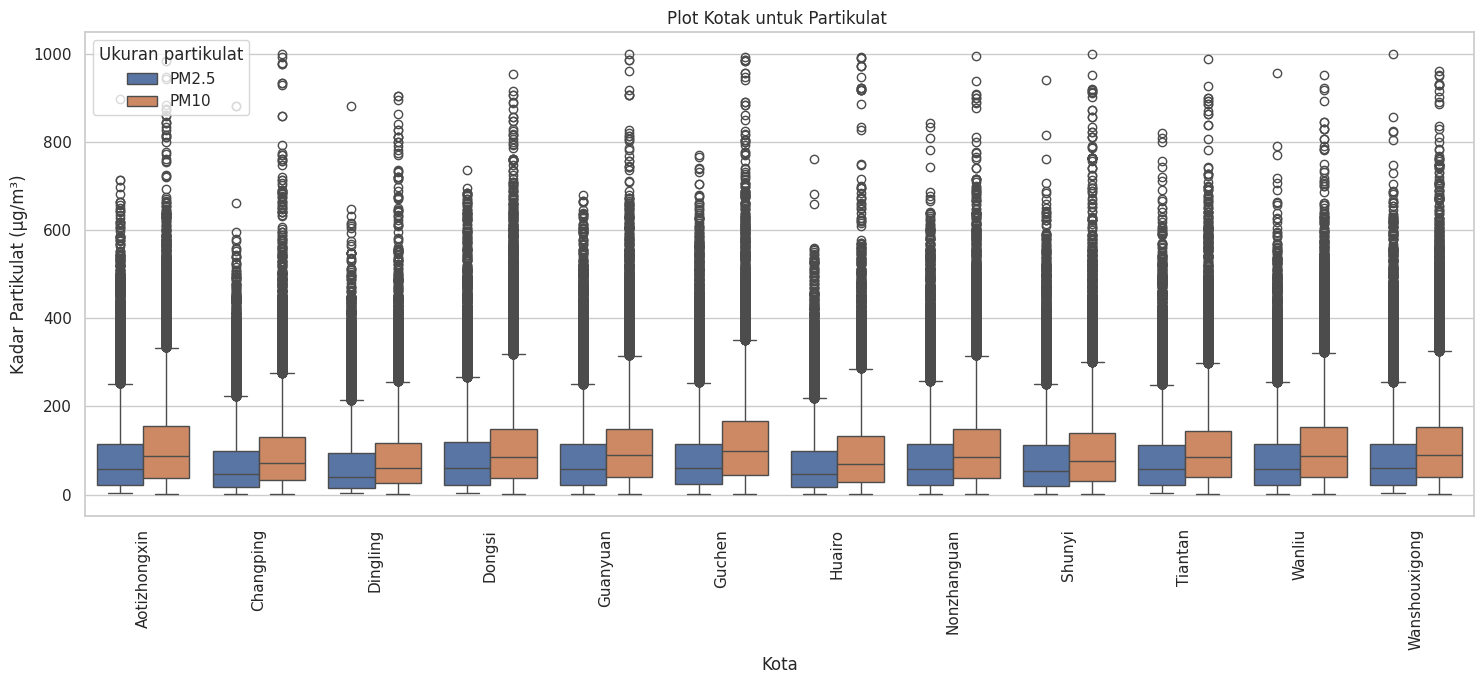

In [26]:
#plot kotak untuk inspeksi
plt.figure(figsize=(15, 7))
sns.boxplot(x='Kota', y='Nilai', hue='Pollutant', data=dflebura)
plt.title('Plot Kotak untuk Partikulat ')
plt.xticks(rotation=90)
plt.ylabel('Kadar Partikulat (µg/m³)')
plt.legend(title='Ukuran partikulat')
plt.tight_layout()
plt.show()


In [27]:
#Inspeksi grafik kotak di Karbon monoksida
coaotiz = dfaotizhongxin['CO'].copy()
coahan = dfchangping['CO'].copy()
codin = dfdingling['CO'].copy()
codon = dfdongsi['CO'].copy()
cogua = dfguanyuan['CO'].copy()
cohua = dfhuairou['CO'].copy()
coguc = dfgucheng['CO'].copy()
conon = dfnonzhanguan['CO'].copy()
cosh = dfshunyi['CO'].copy()
cotia = dftiantan['CO'].copy()
cowa = dfwanliu['CO'].copy()
cowx = dfwanshouxigong['CO'].copy()
#agregasi data
aggb = pd.concat([coaotiz, coahan, codin, codon, cogua, cohua, coguc, conon, cosh, cotia, cowa, cowx], keys=['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan', 'Guchen', 'Huairo',
                        'Nonzhanguan', 'Shunyi', 'Tiantan', 'Wanliu', 'Wanshouxigong'])
aggbdf = aggb.to_frame()
#Pengindeksan ulang untuk CO
aggbdf.reset_index(level=0, inplace=False)  # Create new DataFrame with reset index
aggbdf.rename(columns={'level_0': 'Kota'}, inplace=True)

# Insersi kota:
aggbdf = aggbdf.reset_index(level=0)  # Pengelihatan data
aggbdf.rename(columns={'level_0': 'Kota'}, inplace=True)

dfleburai = aggbdf.melt(id_vars=['Kota'], value_vars=['CO'],
                              var_name='Pollutan', value_name='Nilai')
#ke ilustrasi plot kotak


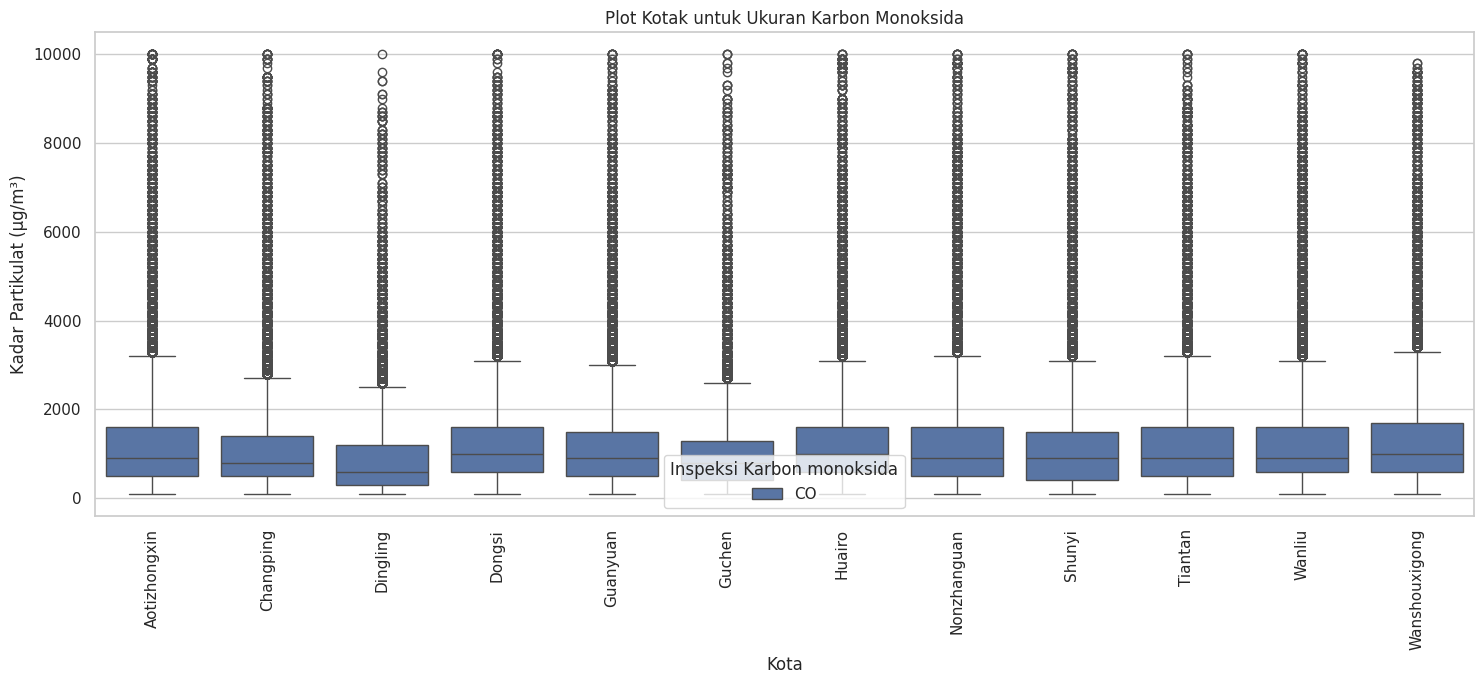

In [28]:
#ilustasi bagian kadar senyawa
sns.set(style="whitegrid")
# Ilustrasi plot kotak
plt.figure(figsize=(15, 7))
sns.boxplot(x='Kota', y='Nilai', hue='Pollutan', data=dfleburai)
plt.title('Plot Kotak untuk Ukuran Karbon Monoksida')
plt.xticks(rotation=90)
plt.ylabel('Kadar Partikulat (µg/m³)')
plt.legend(title='Inspeksi Karbon monoksida')
plt.tight_layout()
plt.show()


In [29]:
#Inspeksi konsentrasi senyawa (SO2, NO2, O3/ozon) untuk dua belas kota
aotizc = dfaotizhongxin[['SO2','NO2','O3']].copy()
chanc = dfchangping[['SO2','NO2','O3']].copy()
dinc = dfdingling[['SO2','NO2','O3']].copy()
donc = dfdongsi[['SO2','NO2','O3']].copy()
guac = dfguanyuan[['SO2','NO2','O3']].copy()
guchc = dfgucheng[['SO2','NO2','O3']].copy()
huac = dfhuairou[['SO2','NO2','O3']].copy()
nonc = dfnonzhanguan[['SO2','NO2','O3']].copy()
shyc = dfshunyi[['SO2','NO2','O3']].copy()
tianc = dftiantan[['SO2','NO2','O3']].copy()
wanc = dfwanliu[['SO2','NO2','O3']].copy()
wxgc = dfwanshouxigong[['SO2','NO2','O3']].copy()

#agresasi dengan nama kota
aggc = pd.concat([aotizc, chanc, dinc, donc, guac, guchc, huac, nonc, shyc, tianc, wanc, wxgc],
                 keys=['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan', 'Guchen', 'Huairo',
                        'Nonzhanguan', 'Shunyi', 'Tiantan', 'Wanliu', 'Wanshouxigong'])
#Pengindeksan ulang untuk senyawa
aggc.reset_index(level=0, inplace=True)
aggc.rename(columns={'level_0': 'Kota'}, inplace=True)
#peleburan nama kota
dfleburb = aggc.melt(id_vars=['Kota'], value_vars=['SO2','NO2','O3'],
                              var_name='Pollutant', value_name='Nilai')


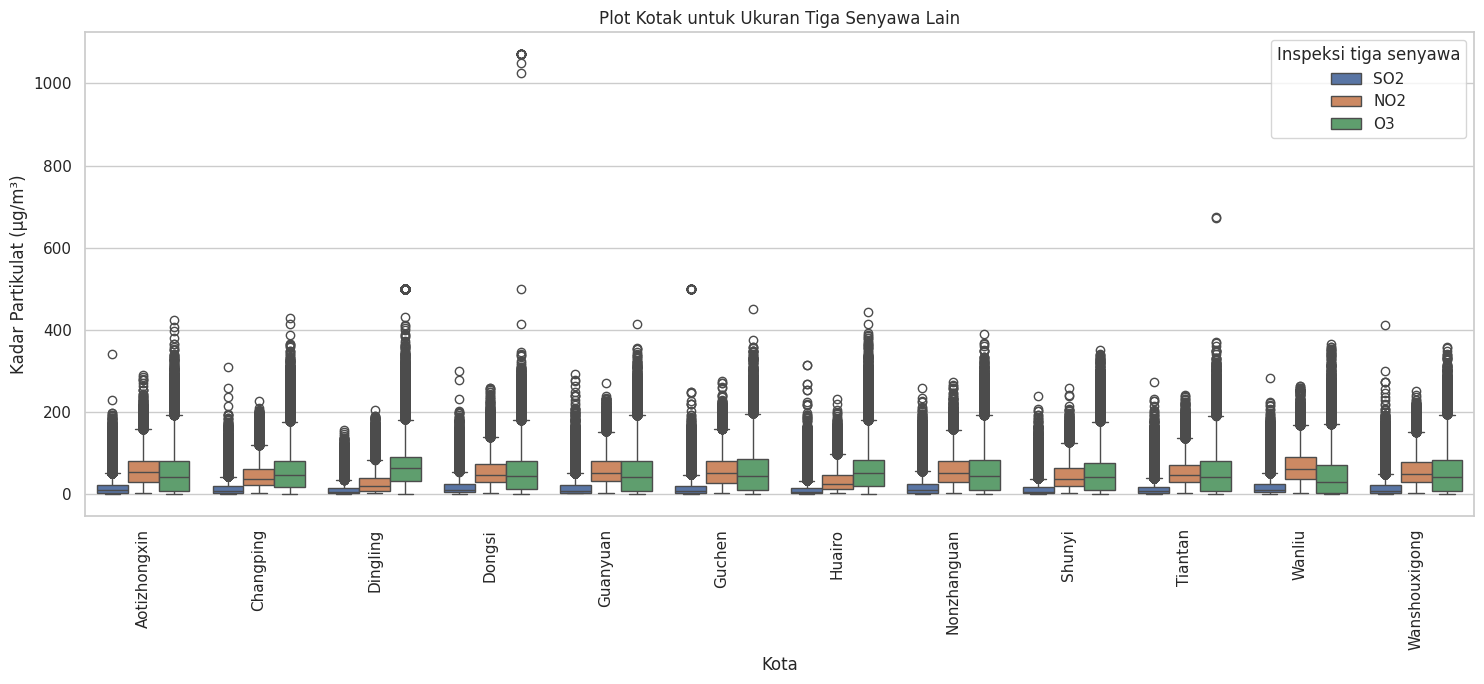

In [30]:
#ilustasi bagian kadar senyawa
sns.set(style="whitegrid")
# Ilustrasi plot kotak
plt.figure(figsize=(15, 7))
sns.boxplot(x='Kota', y='Nilai', hue='Pollutant', data=dfleburb)
plt.title('Plot Kotak untuk Ukuran Tiga Senyawa Lain')
plt.xticks(rotation=90)
plt.ylabel('Kadar Partikulat (µg/m³)')
plt.legend(title='Inspeksi tiga senyawa')
plt.tight_layout()
plt.show()


### Pendalaman Informasi

In [31]:
#Deklarasi Batas aman empat senyawa lain (dalam mikrogram/meter kubik)
[cochl, cogl, ozmin, ozmax, nmax, smax ] = [4000, 30000, 50, 160, 200, 500]

#Pemeriksan kadar senyawa selama pemeriksaan (kadar CO)
coaot = dfaotizhongxin.groupby('datetime')['CO'].mean().copy()
cocch = dfchangping.groupby('datetime')['CO'].mean().copy()
codin = dfdingling.groupby('datetime')['CO'].mean().copy()
codon = dfdongsi.groupby('datetime')['CO'].mean().copy()
cogua = dfguanyuan.groupby('datetime')['CO'].mean().copy()
coguc = dfgucheng.groupby('datetime')['CO'].mean().copy()
cohua = dfhuairou.groupby('datetime')['CO'].mean().copy()
conon = dfnonzhanguan.groupby('datetime')['CO'].mean().copy()
cosh = dfshunyi.groupby('datetime')['CO'].mean().copy()
cotia = dftiantan.groupby('datetime')['CO'].mean().copy()
cowa = dfwanliu.groupby('datetime')['CO'].mean().copy()
cowx = dfwanshouxigong.groupby('datetime')['CO'].mean().copy()

#Bagian ozon
ozao = dfaotizhongxin.groupby('datetime')['O3'].mean().copy()
ozcch = dfchangping.groupby('datetime')['O3'].mean().copy()
ozdin = dfdingling.groupby('datetime')['O3'].mean().copy()
ozdon = dfdongsi.groupby('datetime')['O3'].mean().copy()
ozgua = dfguanyuan.groupby('datetime')['O3'].mean().copy()
ozguc = dfgucheng.groupby('datetime')['O3'].mean().copy()
ozhua = dfhuairou.groupby('datetime')['O3'].mean().copy()
oznon = dfnonzhanguan.groupby('datetime')['O3'].mean().copy()
ozsh = dfshunyi.groupby('datetime')['O3'].mean().copy()
oztia = dftiantan.groupby('datetime')['O3'].mean().copy()
ozwa = dfwanliu.groupby('datetime')['O3'].mean().copy()
ozwx = dfwanshouxigong.groupby('datetime')['O3'].mean().copy()

#Kadar dua senyawa lain (SO2 dan NO2)
dualao = dfaotizhongxin.groupby('datetime')[['SO2','NO2']].mean().copy()
dualch = dfchangping.groupby('datetime')[['SO2','NO2']].mean().copy()
dualdin = dfdingling.groupby('datetime')[['SO2','NO2']].mean().copy()
dualdon = dfdongsi.groupby('datetime')[['SO2','NO2']].mean().copy()
dualgua = dfguanyuan.groupby('datetime')[['SO2','NO2']].mean().copy()
dualguc = dfgucheng.groupby('datetime')[['SO2','NO2']].mean().copy()
dualhua = dfhuairou.groupby('datetime')[['SO2','NO2']].mean().copy()
dualnon = dfnonzhanguan.groupby('datetime')[['SO2','NO2']].mean().copy()
dualsh = dfshunyi.groupby('datetime')[['SO2','NO2']].mean().copy()
dualtia = dftiantan.groupby('datetime')[['SO2','NO2']].mean().copy()
dualwa = dfwanliu.groupby('datetime')[['SO2','NO2']].mean().copy()
dualwx = dfwanshouxigong.groupby('datetime')[['SO2','NO2']].mean().copy()

#sampel untuk deskripsi
"""
coaot.describe()
ozao.describe()
dualao.describe()
"""


'\ncoaot.describe()\nozao.describe()\ndualao.describe()\n'

In [32]:
#Inspeksi suhu dan tekanan
#bagian suhu
tempao = dfaotizhongxin.groupby('datetime')['TEMP'].mean().copy()
tempch = dfchangping.groupby('datetime')['TEMP'].mean().copy()
tempdin = dfdingling.groupby('datetime')['TEMP'].mean().copy()
tempdon = dfdongsi.groupby('datetime')['TEMP'].mean().copy()
tempgua = dfguanyuan.groupby('datetime')['TEMP'].mean().copy()
tempguc = dfgucheng.groupby('datetime')['TEMP'].mean().copy()
tempha = dfhuairou.groupby('datetime')['TEMP'].mean().copy()
tempnon = dfnonzhanguan.groupby('datetime')['TEMP'].mean().copy()
tempsh = dfshunyi.groupby('datetime')['TEMP'].mean().copy()
temptia = dftiantan.groupby('datetime')['TEMP'].mean().copy()
tempwa = dfwanliu.groupby('datetime')['TEMP'].mean().copy()
tempwx = dfwanshouxigong.groupby('datetime')['TEMP'].mean().copy()

#bagian tekanan
presao = dfaotizhongxin.groupby('datetime')['PRES'].mean().copy()
presch = dfchangping.groupby('datetime')['PRES'].mean().copy()
presdin = dfdingling.groupby('datetime')['PRES'].mean().copy()
presdon = dfdongsi.groupby('datetime')['PRES'].mean().copy()
presgua = dfguanyuan.groupby('datetime')['PRES'].mean().copy()
presguc = dfgucheng.groupby('datetime')['PRES'].mean().copy()
presha = dfhuairou.groupby('datetime')['PRES'].mean().copy()
presnon = dfnonzhanguan.groupby('datetime')['PRES'].mean().copy()
presh = dfshunyi.groupby('datetime')['PRES'].mean().copy()
prestia = dftiantan.groupby('datetime')['PRES'].mean().copy()
preswa = dfwanliu.groupby('datetime')['PRES'].mean().copy()
preswx = dfwanshouxigong.groupby('datetime')['PRES'].mean().copy()



In [33]:
#Bagian kelembapan (pointdew)
dewao = dfaotizhongxin.groupby('datetime')['DEWP'].mean().copy()
dewch = dfchangping.groupby('datetime')['DEWP'].mean().copy()
dewdin = dfdingling.groupby('datetime')['DEWP'].mean().copy()
dewdon = dfdongsi.groupby('datetime')['DEWP'].mean().copy()
dewgua = dfguanyuan.groupby('datetime')['DEWP'].mean().copy()
dewguc = dfgucheng.groupby('datetime')['DEWP'].mean().copy()
dewha = dfhuairou.groupby('datetime')['DEWP'].mean().copy()
dewnon = dfnonzhanguan.groupby('datetime')['DEWP'].mean().copy()
dewshu = dfshunyi.groupby('datetime')['DEWP'].mean().copy()
dewtia = dftiantan.groupby('datetime')['DEWP'].mean().copy()
dewwa = dfwanliu.groupby('datetime')['DEWP'].mean().copy()
dewwx = dfwanshouxigong.groupby('datetime')['DEWP'].mean().copy()

#Inspeksi hasil

In [34]:
# eksplorasi ukuran partikulat rata-rata dalam satuan waktu (bagian persiapan rata-rata)
[anPMa, dlPMa, anPMb, dlPMb] = [40, 150, 35, 75]
#batas anual maksimal dan batas paling tinggi untuk PM2.5 dan PM10
dailyao = dfaotizhongxin.groupby('datetime')[['PM2.5','PM10']].mean().copy()
dailycha = dfchangping.groupby('datetime')[['PM2.5','PM10']].mean().copy()
dailydin = dfdingling.groupby('datetime')[['PM2.5','PM10']].mean().copy()
dailydon = dfdongsi.groupby('datetime')[['PM2.5','PM10']].mean().copy()
dailygua = dfguanyuan.groupby('datetime')[['PM2.5','PM10']].mean().copy()
dailyguc = dfgucheng.groupby('datetime')[['PM2.5','PM10']].mean().copy()
dailyhua = dfhuairou.groupby('datetime')[['PM2.5','PM10']].mean().copy()
dailynon = dfnonzhanguan.groupby('datetime')[['PM2.5','PM10']].mean().copy()
dailysh = dfshunyi.groupby('datetime')[['PM2.5','PM10']].mean().copy()
dailytia = dftiantan.groupby('datetime')[['PM2.5','PM10']].mean().copy()
dailywa = dfwanliu.groupby('datetime')[['PM2.5','PM10']].mean().copy()
dailywx = dfwanshouxigong.groupby('datetime')[['PM2.5','PM10']].mean().copy()

#pengecekan kolom hari
#dfaotizhongxin['datetime']

#Inspeksi nilai tertinggi, nilai terrendah, dan inspek statistik rata-rata total
#Kota Aotizhongxin
[daomax, daomin] = [np.round(dailyao[['PM2.5', 'PM10']].max(), 3) , np.round(dailyao[['PM2.5', 'PM10']].min(), 3)]
daorange = daomax - daomin # jangkauan
[daomean, daoq1, daomed, daoq3]  = [np.round(dailyao[['PM2.5', 'PM10']].mean(), 3), np.round(dailyao[['PM2.5', 'PM10']].quantile(0.25), 3), np.round(dailyao[['PM2.5', 'PM10']].median(), 3),
           np.round(dailyao[['PM2.5', 'PM10']].quantile(0.75), 3)]
daoiq = daoq3 - daoq1 #Jangkauan kuartil di Kota Aotizhongxin
#Kota Changpin
[dchmax, dchmin] = [np.round(dailycha[['PM2.5', 'PM10']].max(), 3) , np.round(dailycha[['PM2.5', 'PM10']].min(), 3)]
dchrange = dchmax - dchmin # jangkauan
[dchmean, dchq1, dchmed, dchq3]  = [np.round(dailycha[['PM2.5', 'PM10']].mean(), 3), np.round(dailycha[['PM2.5', 'PM10']].quantile(0.25), 3), np.round(dailycha[['PM2.5', 'PM10']].median(), 3),
           np.round(dailycha[['PM2.5', 'PM10']].quantile(0.75), 3)]
dchiq = dchq3 - dchq1 #Jangkauan kuartil di Kota Changping
#Kota Dingling
[ddinmax, ddinmin] = [np.round(dailydin[['PM2.5', 'PM10']].max(), 3) , np.round(dailydin[['PM2.5', 'PM10']].min(), 3)]
ddinrange = ddinmax - ddinmin # jangkauan
[ddimean, ddiq1, ddimed, ddiq3 ] = [np.round(dailydin[['PM2.5', 'PM10']].mean(), 3), np.round(dailydin[['PM2.5', 'PM10']].quantile(0.25), 3), np.round(dailydin[['PM2.5', 'PM10']].median(), 3),
           np.round(dailydin[['PM2.5', 'PM10']].quantile(0.75), 3)]
ddinq = ddiq3 - ddiq1 #Jangkauan kuartil di Kota Dingling
#Kota Dongsi
[ddomax, ddomin] = [np.round(dailydon[['PM2.5', 'PM10']].max(), 3) , np.round(dailydon[['PM2.5', 'PM10']].min(), 3)]
ddorange = ddomax - ddomin # jangkauan data
[ddomean, ddoq1, ddomed, ddoq3] = [np.round(dailydon[['PM2.5', 'PM10']].mean(), 3), np.round(dailydon[['PM2.5', 'PM10']].quantile(0.25), 3), np.round(dailydon[['PM2.5', 'PM10']].median(), 3),
           np.round(dailydon[['PM2.5', 'PM10']].quantile(0.75), 3)]
ddoiq = ddoq3 - ddoq1 #Jangkauan kuartil di Kota Dongsi
#Kota Guanyuan
[dguamx, dguami] = [np.round(dailygua[['PM2.5', 'PM10']].max(), 3) , np.round(dailygua[['PM2.5', 'PM10']].min(), 3)]
dguarange = dguamx - dguami # jangkauan data
[dgumean, dguaq1, dguamed, dguaq3] = [np.round(dailygua[['PM2.5', 'PM10']].mean(), 3), np.round(dailygua[['PM2.5', 'PM10']].quantile(0.25), 3), np.round(dailygua[['PM2.5', 'PM10']].median(), 3),
           np.round(dailygua[['PM2.5', 'PM10']].quantile(0.75), 3)]
dguaiq = dguaq3 - dguaq1 #Jangkauan kuartil di Kota Guanyuan
#Kota Gucheng
[dgucmx, dguci] = [np.round(dailyguc[['PM2.5', 'PM10']].max(), 3) , np.round(dailyguc[['PM2.5', 'PM10']].min(), 3)]
dgucrange = dgucmx - dguci
[dgucmean, dgucq1, dgucmed, dgucq3 ]= [np.round(dailyguc[['PM2.5', 'PM10']].mean(), 3), np.round(dailyguc[['PM2.5', 'PM10']].quantile(0.25), 3), np.round(dailyguc[['PM2.5', 'PM10']].median(), 3),
           np.round(dailyguc[['PM2.5', 'PM10']].quantile(0.75), 3)]
dguciq = dgucq3 - dgucq1

#Kota Huairou
[dhuamx, dhuami] = [np.round(dailyhua[['PM2.5', 'PM10']].max(), 3) , np.round(dailyhua[['PM2.5', 'PM10']].min(), 3)]
dhuarange = dhuamx - dhuami # jangkauan data
[dhumean, dhuaq1, dhuamed, dhuaq3] = [np.round(dailyhua[['PM2.5', 'PM10']].mean(), 3), np.round(dailyhua[['PM2.5', 'PM10']].quantile(0.25), 3), np.round(dailyhua[['PM2.5', 'PM10']].median(), 3),
           np.round(dailyhua[['PM2.5', 'PM10']].quantile(0.75), 3)]
dhuiqr = dhuaq3 - dhuaq1 #Jangkauan kuartil di Kota Huairou
#Kota Nonzhanguan
[dnonmx, dnonami] = [np.round(dailynon[['PM2.5', 'PM10']].max(), 3) , np.round(dailynon[['PM2.5', 'PM10']].min(), 3)]
dnonrange = dhuamx - dhuami # jangkauan data
[dnonmean, dnonq1, dnonmed, dnonaq3] = [np.round(dailynon[['PM2.5', 'PM10']].mean(), 3), np.round(dailynon[['PM2.5', 'PM10']].quantile(0.25), 3), np.round(dailynon[['PM2.5', 'PM10']].median(), 3),
           np.round(dailynon[['PM2.5', 'PM10']].quantile(0.75), 3)]
dnoniqr = dnonaq3 - dnonq1 #Jangkauan kuartil di Kota Nonzhanguan
#Kota Shunyi
[dshumx, dshumi] = [np.round(dailysh[['PM2.5', 'PM10']].max(), 3) , np.round(dailysh[['PM2.5', 'PM10']].min(), 3)]
dshurange = dshumx - dshumi # jangkauan data
[dshumean, dshuq1, dshumed, dshuq3] = [np.round(dailysh[['PM2.5', 'PM10']].mean(), 3), np.round(dailysh[['PM2.5', 'PM10']].quantile(0.25), 3), np.round(dailysh[['PM2.5', 'PM10']].median(), 3),
           np.round(dailysh[['PM2.5', 'PM10']].quantile(0.75), 3)]
dshuiqr = dshuq3 - dshuq1 #Jangkauan kuartil di Kota Shunyi
#Kota Tiantan
[dtiamx, dtiami] = [np.round(dailytia[['PM2.5', 'PM10']].max(), 3) , np.round(dailytia[['PM2.5', 'PM10']].min(), 3)]
dtiarange = dtiamx - dtiami # jangkauan data
[dtiamean, dtiaq1, dtiamed, dtiaq3] = [np.round(dailytia[['PM2.5', 'PM10']].mean(), 3), np.round(dailytia[['PM2.5', 'PM10']].quantile(0.25), 3), np.round(dailytia[['PM2.5', 'PM10']].median(), 3),
           np.round(dailytia[['PM2.5', 'PM10']].quantile(0.75), 3)]
dtiaiqr = dtiaq3 - dtiaq1 #Jangkauan kuartil di Kota Tiantan
#Kota Wanliu
[dwamx, dwami] = [np.round(dailywa[['PM2.5', 'PM10']].max(), 3) , np.round(dailywa[['PM2.5', 'PM10']].min(),3)]
dwarange = dwamx - dwami # jangkauan data
[dwamean, dwaq1, dwamed, dwaq3] = [np.round(dailywa[['PM2.5', 'PM10']].mean(), 3), np.round(dailywa[['PM2.5', 'PM10']].quantile(0.25), 3), np.round(dailywa[['PM2.5', 'PM10']].median(), 3),
           np.round(dailytia[['PM2.5', 'PM10']].quantile(0.75), 3)]
dwaiqr = dwaq3 - dwaq1 #Jangkauan kuartil di Kota Wanliu

#Kota Wanshouxigong
[dwxamx, dwami] = [np.round(dailywx[['PM2.5', 'PM10']].max(), 3) , np.round(dailywx[['PM2.5', 'PM10']].min(), 3)]
dwxarange = dwxamx - dwami # jangkauan data
[dwxmean, dwxq1, dwxmed, dwxq3] = [np.round(dailywx[['PM2.5', 'PM10']].mean(), 3), np.round(dailywx[['PM2.5', 'PM10']].quantile(0.25), 3), np.round(dailywx[['PM2.5', 'PM10']].median(), 3),
           np.round(dailywx[['PM2.5', 'PM10']].quantile(0.75), 3)]
dwxiqr = dwxq3 - dwxq1 #Jangkauan kuartil di Kota Wanshouxigong

#Resume inspeksi partikulat (dari rata-rata ke nilai interquartil)
inspk = {'Kota Aotizhongxin' : [daomean, daomax, daomin, daorange, daoq1, daomed, daoq3, daoiq], #Aotizhongxin
    'Kota Changping' : [dchmean, dchmax, dchmin, dchrange, dchq1, dchmed, dchq3, dchiq], #Changpin
    'Kota Dingling' : [ddimean, ddinmax, ddinmin, ddinrange, ddiq1, ddimed, ddiq3, ddinq], #Dingling
    'Kota Dongsi' : [ddomean, ddomax, ddomin, ddorange, ddoq1, ddomed, ddoq3, ddoiq], #Dongsi
    'Kota Guanyuan' : [dgumean,dguamx, dguami, dguarange, dguaq1, dguamed, dguaq3, dguaiq], #Guanyuan
    'Kota Gucheng' : [dgucmean, dgucmx, dguci, dgucrange, dgucq1, dgucmed, dgucq3, dguciq], #Gucheng
    'Kota Huairou' : [dhumean, dhuamx, dhuami, dhuarange, dhuaq1, dhuamed, dhuaq3, dhuiqr], #Huairou
    'Kota Nonzhanguan' : [dnonmean, dnonmx, dnonami, dnonrange, dnonq1, dnonmed, dnonaq3, dnoniqr], #Nonzhanguan
    'Kota Shunyi' : [dshumean, dshumx, dshumi, dshurange, dshuq1, dshumed, dshuq3, dshuiqr], #Shunyi
    'Kota Tiantan' : [dtiamean, dtiamx, dtiami, dtiarange, dtiaq1, dtiamed, dtiaq3, dtiaiqr],
    'Kota Wanliu' : [dwamean, dwamx, dwami, dwarange, dwaq1, dwamed, dwaq3, dwaiqr],
    'Kota Wanshouxigong' : [dwxmean, dwxamx, dwami, dwxarange, dwxq1, dwxmed, dwxq3, dwxiqr]}



In [ ]:
#cek hasil
print("Hasil kota Aotizhongxin ",inspk['Kota Aotizhongxin'],'\n')
print("Hasil kota Changpin ",inspk['Kota Changping'],'\n')
print("Hasil kota Dingling ",inspk['Kota Dingling'])

#Resume
##a. Hasil data tidak dibuang untuk memastikan kondisi sesuai dengan asli
##b. indikator 'a' adalah PM2.5 b adlaah PM10.

## Tahpa Visualisasi dan Analisis Eksplanatori (Visualization & Explanatory Analysis)

### Pertanyaan 1:

In [36]:
#Tahap awal visualisasi untuk pertanyaan 1 (a adalah PM2.5 b adalah PM10)
def plot_particulate_data(df_list, labels, colors, title):
    plt.figure(figsize=(18, 9))

    # Plot both PM2.5 and PM10
    for df, label, color in zip(df_list, labels, colors):
        plt.plot(df['datetime'], df['PM2.5'], marker='o', linestyle='-', label=f'{label} - PM2.5', color=color)
        plt.plot(df['datetime'], df['PM10'], marker='x', linestyle='--', label=f'{label} - PM10', color=color)

    # Batas Keamanan
    plt.axhline(y=anPMa, color='yellow', linestyle='--', label='Batas Anual PM2.5')
    plt.axhline(y=dlPMa, color='red', linestyle='-.', label='Batas Maksimal PM2.5')
    plt.axhline(y=anPMb, color='orange', linestyle='--', label='Batas Anual PM10')
    plt.axhline(y=dlPMb, color='red', linestyle='-', label='Batas Maksimal PM10')

    # Chart details
    plt.title(title, fontsize=20)
    plt.xlabel('Tanggal', fontsize=16)
    plt.ylabel('Ukuran Partikulat (µg/m³)', fontsize=16)
    plt.grid(True)
    plt.legend(title='Indikator', fontsize=12)
    plt.xticks(rotation=90)

    plt.tight_layout()  # Penghindaran penumpukan
    plt.show()
#ke analisis senyawa

In [56]:
#Deklarasi Batas aman empat senyawa lain (dalam mikrogram/meter kubik)
[cochl, cogl, ozmin, ozmax, nmax, smax ] = [4000, 30000, 50, 160, 200, 500]

#deklarasi batas senyawa nitrogen dan sulfur
[noanl, nohl, sohl, sodl, smax] = [40, nmax, 350, 125, smax]

#Penulisan batas aman senyawa
colim = [cochl, cogl] #batas cina dan global
ozlim = [ozmin, ozmax]
nolim = [noanl, nohl]
solim = [sodl, sohl, smax]

#fungsi pembentukan grafik senyawa
def plot_compound1 (df_list, labels, colors, title):
    plt.figure(figsize=(18, 9))
    #Inspeksi senyawa Karbon Monoksida
    for df, label, color in zip(df_list, labels, colors):
        plt.plot(df['datetime'], df['CO'], marker='o', linestyle='-', label=f'{label} - Kadar CO', color=color)

        # Batas Keamanan di senyawa
    plt.axhline(y=colim[0], color='yellow', linestyle='--', label='Batas Standar Senyawa CO di cina')

    # Chart details
    plt.title(title, fontsize=20)
    plt.xlabel('Tanggal', fontsize=16)
    plt.ylabel('Ukuran Konsentrasi Senyawa (µg/m³)', fontsize=16)
    plt.grid(True)
    plt.legend(title='Indikator', fontsize=12)
    plt.xticks(rotation=90)

    plt.tight_layout()  # Penghindaran penumpukan
    plt.show()
#ke pembuatan fungsi untuk senyawa ozon

In [64]:
#Fungsi pembentukan senyawa ozon
def plot_compoundii (df_list, labels, colors, title):
    plt.figure(figsize=(18, 9))
    #Inspeksi senyawa ozon
    for df, label, color in zip(df_list, labels, colors):
#Inspeksi senyawa ozon
        plt.plot(df['datetime'], df['O3'], marker='x', linestyle='--', label=f'{label} - Kadar O3', color=color)
#Batas senyawa ozon
    plt.axhline(y=ozlim[0], color='green', linestyle='--', label='Batas Minimal Ozon')
    plt.axhline(y=ozlim[1], color='yellow', linestyle='-', label='Batas Maksimal Ozon')
    #Inspeksi grafik
    # Chart details
    plt.title(title, fontsize=20)
    plt.xlabel('Tanggal', fontsize=16)
    plt.ylabel('Ukuran Konsentrasi Senyawa (µg/m³)', fontsize=16)
    plt.grid(True)
    plt.legend(title='Indikator', fontsize=12)
    plt.xticks(rotation=90)

    plt.tight_layout()  # Penghindaran penumpukan
    plt.show()
#pembentukan grafik di senyawa Nitrogen dioksida dan SO2
def plot_compoundiii (df_list, labels, colors, title):
    plt.figure(figsize=(18, 9))
    #Inspeksi senyawa Nitrogen dioksida
    for df, label, color in zip(df_list, labels, colors):
#persiapan batas senyawa NO2 dan SO2 (Inspeksi senyawa Sulfur Dioksida)
        plt.plot(df['datetime'], df['SO2'], marker='x', linestyle='--', label=f'{label} - Kadar SO2', color=color)
    #inspeksi senyawa Nitrogen Dioksida
        plt.plot(df['datetime'], df['NO2'], marker='x', linestyle='--', label=f'{label} - Kadar NO2', color=color)
#Deklarasi batas aman
        plt.axhline(y=nolim[0], color='orange', linestyle='--', label='Batas Minimal Nitrogen Dioksida')
        plt.axhline(y=nolim[1], color='yellow', linestyle='-', label='Batas Maksimal Nitrogen Dioksida')
        plt.axhline(y=solim[0], color='lightyellow', linestyle='--', label='Batas Maksimal harian Sulfur Dioksida')
        plt.axhline(y=solim[1], color='darkorange', linestyle='-', label='Batas Maksimal 8 jam Sulfur Dioksida')
        plt.axhline(y=solim[2], color='red', linestyle='-', label='Batas Sangat Maksimal Sulfur Dioksida')
#Aspek senyawa lain
        plt.title(title, fontsize=20)
        plt.xlabel('Tanggal', fontsize=16)
        plt.ylabel('Ukuran Konsentrasi Senyawa (µg/m³)', fontsize=16)
        plt.grid(True)
        plt.legend(title='Indikator', fontsize=12)
        plt.xticks(rotation=90)

        plt.tight_layout()  # Penghindaran penumpukan
        plt.show()
# ke seksi grafik analisis aspek fisika

In [79]:
#deklarasi batas suhu, tekanan, dan kelambapan
#suhu
[nolim, diglim, nrmlim, pnslim] = [0, 10, 25, 35]
#tekanan
atm = 1013.25
#kelembapan
[drl, comdr, humin] = [10, 15, 20]
#Btas Kecepatan angin
[btng, ring, meng, lmbt, sgr, kut] = [1, 3, 5, 11, 17, 24]

#Fungsi penentu di aspek fisika
def dah_analysis(df_list, labels, colors, title):
    plt.figure(figsize=(18, 9))
#Inspeksi senyawa Suhu dan Kelembapan
    for df, label, color in zip(df_list, labels, colors):
      #Inspeksi suhu
        plt.plot(df['datetime'], df['TEMP'], marker='o', linestyle='-', label=f'{label} - Suhu', color=color)
     #Inspeksi kelembapan
        plt.plot(df['datetime'], df['DEWP'], marker='x', linestyle='--', label=f'{label} - Kelembapan', color=color)
  #Inspeksi batas aman indikator suhu
    plt.axhline(y=nolim, color='yellow', linestyle='--', label='Batas Suhu nol')
    plt.axhline(y=diglim, color='red', linestyle='-.', label='Batas Suhu dingin')
    plt.axhline(y=nrmlim, color='green', linestyle='--', label='Batas Suhu Normal')
    plt.axhline(y=pnslim, color='yellow', linestyle='-', label='Batas Suhu Panas')
    #analisis kelembapan
    plt.axhline(y=drl, color='yellow', linestyle='-', label='Batas Maksimal Kering')
    plt.axhline(y=comdr, color='cyan', linestyle='-', label='Batas Minimal Normal')
    plt.axhline(y=humin, color='yellow', linestyle='-', label='Batas Maksimal lembab')

  #Ilustrasi grafik
    plt.title(title, fontsize=20)
    plt.xlabel('Tanggal', fontsize=16)
    plt.ylabel('Nilai Suhu dalam celsius', fontsize=16)
    plt.grid(True)
    plt.legend(title='Indikator Suhu dan Kelembapan', fontsize=12)
    plt.xticks(rotation=90)

    plt.tight_layout()  # Penghindaran penumpukan
    plt.show()
#ke aspek analisis tekanan

In [40]:
#Fungsi analisis tekanan
def pres_analysis(df_list, labels, colors, title):
    plt.figure(figsize=(18, 9))
 #Inspeksi senyawa Suhu dan Kelembapan
    for df, label, color in zip(df_list, labels, colors):
    #Inspeksi tekanan
        plt.plot(df['datetime'], df['PRES'], marker='x', linestyle='--', label=f'{label} - Tekanan', color=color)
    #Batas tekanan atmosfer
        plt.axhline(y=atm, color='orange', linestyle='--', label='Batas Tekanan atmosfer')
    #Aspek lain
    plt.title(title, fontsize=20)
    plt.xlabel('Tanggal', fontsize=16)
    plt.ylabel('Nilai Tekanan dalam Hpa', fontsize=16)
    plt.grid(True)
    plt.legend(title='Indikator Tekanan', fontsize=12)
    plt.xticks(rotation=90)

    plt.tight_layout()  # Penghindaran penumpukan
    plt.show()
#ke aspek analisis kecepatan angin

In [85]:
#fungsi kecepatan angin
def wspm_analysis(df_list, labels, colors, title):
    plt.figure(figsize=(18, 9))
 #Inspeksi senyawa Suhu dan Kelembapan
    for df, label, color in zip(df_list, labels, colors):
    #inspeksi kecepatan angin
        plt.plot(df['datetime'], df['WSPM'], marker='x', linestyle='--', label=f'{label} - kecepatan angin', color=color)
    #Batas kecepatan angin
        plt.axhline(y=btng, color='lightblue', linestyle='--', label='Batas Angin Lembut')
        plt.axhline(y=ring, color='blue', linestyle='--', label='Batas Angin Ringan')
        plt.axhline(y=meng, color='darkblue', linestyle='--', label='Batas Angin Sedang')
        plt.axhline(y=lmbt, color='darkgreen', linestyle='--', label='Batas Angin Lmbut')
        plt.axhline(y=sgr, color='green', linestyle='--', label='Batas Angin Segar')
    #Aspek lain
    plt.title(title, fontsize=20)
    plt.xlabel('Tanggal', fontsize=16)
    plt.ylabel('Nilai Kecepatan angin (m/s)', fontsize=16)
    plt.grid(True)
    plt.legend(title='Indikator Kecepatan angin', fontsize=12)
    plt.xticks(rotation=90)

    plt.tight_layout()  # Penghindaran penumpukan
    plt.show()

In [42]:
#perispan dataset untuk inspeksi senyawa kimia
aotizcomp = {'datetime': dfaotizhongxin['datetime'],'CO': dfaotizhongxin['CO'],'O3': dfaotizhongxin['O3'],'SO2': dfaotizhongxin['SO2'],'NO2': dfaotizhongxin['NO2']} #di Aotizhongxin
changcomp = {'datetime': dfchangping['datetime'],'CO': dfchangping['CO'],'O3': dfchangping['O3'],'SO2': dfchangping['SO2'],'NO2': dfchangping['NO2']} #di Changping
dingcomp = {'datetime': dfdingling['datetime'],'CO': dfdingling['CO'], 'O3': dfdingling['O3'],'SO2': dfdingling['SO2'],'NO2': dfdingling['NO2']}
dongcomp = {'datetime': dfdongsi['datetime'],'CO': dfdongsi['CO'], 'O3': dfdongsi['O3'],'SO2': dfdongsi['SO2'],'NO2': dfdongsi['NO2']} #di Dongsi
guacomp = {'datetime': dfguanyuan['datetime'],'CO': dfguanyuan['CO'], 'O3': dfguanyuan['O3'],'SO2': dfguanyuan['SO2'],'NO2': dfguanyuan['NO2']} #di Guanyuan
guccomp = {'datetime': dfgucheng['datetime'],'CO': dfgucheng['CO'], 'O3': dfgucheng['O3'],'SO2': dfgucheng['SO2'],'NO2': dfgucheng['NO2']} #di Gucheng
huacomp = {'datetime': dfhuairou['datetime'],'CO': dfhuairou['CO'], 'O3': dfhuairou['O3'],'SO2': dfhuairou['SO2'],'NO2': dfhuairou['NO2']} #di Huairou
noncomp = {'datetime': dfnonzhanguan['datetime'],'CO': dfnonzhanguan['CO'], 'O3': dfnonzhanguan['O3'],'SO2': dfnonzhanguan['SO2'],'NO2': dfnonzhanguan['NO2']} #di Nonzhanguan
shucomp = {'datetime': dfshunyi['datetime'],'CO': dfshunyi['CO'], 'O3': dfshunyi['O3'],'SO2': dfshunyi['SO2'],'NO2': dfshunyi['NO2']} #di Shunyi
tiancomp = {'datetime': dftiantan['datetime'],'CO': dftiantan['CO'],'O3': dftiantan['O3'],'SO2': dftiantan['SO2'],'NO2': dftiantan['NO2']} #di Tiantan
wancomp = {'datetime': dfwanliu['datetime'],'CO': dfwanliu['CO'],'O3': dfwanliu['O3'],'SO2': dfwanliu['SO2'],'NO2': dfwanliu['NO2']} #di Wanliu
wxcomp = {'datetime': dfwanshouxigong['datetime'],'CO': dfwanshouxigong['CO'],'O3': dfwanshouxigong['O3'],'SO2': dfwanshouxigong['SO2'],'NO2': dfwanshouxigong['NO2']} #di Wanshouxigong

#konvers i ke 'dataframe'
dfaotizcomp = pd.DataFrame(aotizcomp)
dfchangcomp = pd.DataFrame(changcomp)
dfdingcomp = pd.DataFrame(dingcomp)
dfdongcomp = pd.DataFrame(dongcomp)
dfguacomp = pd.DataFrame(guacomp)
dfguccomp = pd.DataFrame(guccomp)
dfhuacomp = pd.DataFrame(huacomp)
dfnoncomp = pd.DataFrame(noncomp)
dfshucomp = pd.DataFrame(shucomp)
dftiancomp = pd.DataFrame(tiancomp)
dfwancomp = pd.DataFrame(wancomp)
dfwxcomp = pd.DataFrame(wxcomp)

#fungsi analisis kimia

**Penjelasan Pertanyaan 1**

In [ ]:
#Bagian Ilustrasi grafik (Kota Aotizhingxin sampai Dongsi)
plot_particulate_data(
    [dfaotizhongxin],['Aotizhongxin'],
    ['blue'], 'Inspeksi Partikulat di Aotizhongxin')
#Kota Changping
plot_particulate_data( [dfchangping], ['Changping'], ['red'], 'Inspeksi Partikulat di Changping')
#Kota Dingling
plot_particulate_data([dfdingling],['Dingling'],['green'],'Inspeksi Partikulat di Dingling')
#Kota Dongsi
plot_particulate_data(
    [dfdongsi],
    ['Dongsi'],
    ['orange'],
    'Inspeksi Partikulat di Dongsi'
)

In [ ]:
#Dari Guanyuan to Nonzhanguan
#Guanyuan
plot_particulate_data([dfguanyuan],['Guanyuan'],['black'], 'Inspeksi Partikulat di Dongsi')
#Gucheng
plot_particulate_data(
    [dfgucheng],
    ['Gucheng'],
    ['violet'],
    'Inspeksi Partikulat di Gucheng'
)
#Huairou
plot_particulate_data(
    [dfhuairou],
    ['Huairou'],
    ['grey'],
    'Inspeksi Partikulat di Huairou'
)
#Nonzhanguan
plot_particulate_data(
    [dfnonzhanguan],
    ['Nonzhanguan'],
    ['darkred'],
    'Inspeksi Partikulat di Nonzhanguan'
)


In [ ]:
# Section Shunyi to Wanshouxigong
#Kota Shunyi
plot_particulate_data([dfshunyi],['Shunyi'],
    ['cyan'], 'Inspeksi Partikulat di Shunyi')
#Kota Tiantan
plot_particulate_data(
    [dftiantan], ['Tiantan'],
    ['magenta'],'Inspeksi Partikulat di JKota Tiantan')
#Kota Wanliu
plot_particulate_data(
    [dfwanliu],['Wanliu'],['violet'],
    'Inspeksi Partikulat di Kota Wanliu'
)
#Kota Wanshouxigong
plot_particulate_data(
    [dfwanshouxigong],['Wanshouxigong'],
    ['darkblue'],'Inspeksi Partikulat di Kota Wanshouxigong'
)

In [46]:
#Pemeriksaan frekuensi di ambang batas (Partikulat) [a adalah PM2.5 b adalah PM10]
#Kumpulan data dari baris sebelumnya
harian = {'Aotizhongxin': dailyao,'Changping': dailycha,
    'Dingling': dailydin,'Dongsi': dailydon,'Guanyuan': dailygua,'GUcheng': dailyguc,
    'Huairou': dailyhua,'Nonzhanguan': dailynon,'Shinyi': dailysh, 'Tiantan': dailytia,
    'Wanliu': dailywa, 'Wanshouxigong': dailywx}
#Parameter pembatas
bataspar = {'PM2.5 anual':  anPMa, 'PM2.5 maksimal': dlPMa,
    'PM10 anual': anPMb, 'PM10 maksimal' : dlPMb}

#Defininsi iterasi untuk pemeriksaan (a adalah PM2.5 b adalah PM10)
lbh = {}
#iterasi untuk pengisian
for kota, data in harian.items():
  anuapma = ((data['PM2.5'] > bataspar['PM2.5 anual']) & (data['PM2.5'] <= bataspar['PM2.5 maksimal'])).sum() #lebih dari batas anual maksimal (PM2.5)
  maxpma = (data['PM2.5'] <= bataspar['PM2.5 maksimal']).sum() # diatas batas maksimal (PM2.5)
  anuapmb = ((data['PM10'] > bataspar['PM10 anual']) & (data['PM10'] <= bataspar['PM10 maksimal'])).sum() #lebih dari batas anual (PM10)
  maxpmb = (data['PM10'] <= bataspar['PM10 maksimal']).sum()
  lbh[kota] = [anuapma, maxpma, anuapmb, maxpmb]
#Penulisan laporan



#Rincian Laporan Partikulat
Urutan pembacaan: kasus PM2.5 di indeks 0 dan 1. Kasus PM10 di indeks 2 dan 3
- {'Aotizhongxin': [15715, 29445, 7565, 15732]}
- {'Changping': [14462, 30631, 8797, 18136]}
- {'Dingling': [13498, 30912, 8620, 20318]}
-{'Dongsi': [15718, 29038, 7459, 15716]}
- {'Guanyuan': [16178, 29550, 7467, 15283]}
- {'Gucheng': [16356, 29474, 6750,13767]}
- {'Huairou': [14773, 30895, 8064, 18653]}
-{'Nonzhanguan': [15531, 29105, 7468, 15738]}
- {'Shunyi': [15139, 29685, 7420, 17255]}}
- {'Tiantan': [15918, 29515, 8084, 15655]}
- {'Wanliu': [15912, 29332, 7540, 15351]}
- {'Wanshouxigong': [15765, 29210, 6901, 15020]}


**Resume Inspeksi Partikulat**
* Bagian inspeksi partikulat ukuran 2.5 mikrometer
*- Total kasus partikulat melewati batas anual untuk semua kota sudah melewati 10 ribu
*- Di sisi lain, kasus partikulat 2.5 mikro yang melampaui ambang batas sudah menembus 20 ribu.
*- Kota Changping, Kota Huairou, dan Kota Dingling mempunyai kasus partikulat yang melewati batas maksimal untuk ukuran 2.5 mikro di atas 30 ribu. Kota Dingling adalah kota yang paling tinggi diantara ketiganya.
*-Melanjuti hal sebelumnya, kota Huairo di urutan kedua tertinggi
* Bagian inspeksi partikulat ukuran 10 mikrometer
*- Jumlah kasus partikulat melewati batas anual partikulat 10 mikrometer untuk semua kota sudah melewati 5 ribu.
*- Ada empat kota (Changping, Dingling, Huairou, Tiantan) yang melewati delapan ribu kasus untuk partikulat melewati batas anual
*- Total kasus yang melampaui batas maksimal partikulat sudah melampaui 10 ribu.
*- Kota Dingling adalah satu-satunya kota dengan total kasus partikulat ukuran 10 mikro yang melewati batas maksimal yang memiliki nilai di atas 20 ribu.


### Pertanyaan 2:

In [ ]:
#Tahap awal visualisasi untuk pertanyaan 2 (bagian persiapan dataset yang diinginkan)
plot_compound1([dfaotizcomp], ['Aotizhongxin'], ['red'], 'Analisis Senyawa CO di Aotizhongxin') #Inspeksi senyawa CO di Aotizhongxin
plot_compound1([dfchangcomp], ['Changping'], ['black'], 'Analisis Senyawa CO di Changping') #Inspeksi senyawa CO di Changpin
plot_compound1([dfdingcomp], ['Dingling'], ['cyan'], 'Analisis Senyawa CO di Dingling') #Inspeksi senyawa CO di Dingling

In [ ]:
#Dari Dongsi sampai Guceng
plot_compound1([dfdongcomp], ['Dongsi'], ['orange'], 'Analisis Senyawa CO di Dongsi') #Inspeksi senyawa CO di Dongsi
plot_compound1([dfguacomp], ['Guanyuan'], ['black'], 'Analisis Senyawa') #Inspeksi senyawa CO di Guanyuan
plot_compound1([dfguccomp], ['Gucheng'], ['violet'], 'Analisis Senyawa') #Inspeksi senyawa CO di Gucheng

In [ ]:
#Dari Huairou sampau Shunyi
plot_compound1([dfhuacomp], ['Huairou'], ['grey'], 'Analisis Senyawa CO di Huairou') #Inspeksi senyawa CO di Huairou
plot_compound1([dfnoncomp], ['Nonzhanguan'], ['darkred'], 'Analisis Senyawa CO di Nonzhanguan') #Inspeksi senyawa CO di Nonzhanguan


In [ ]:
#Tiga kota terakhir


In [48]:
#Inspeksi laporan Bagian CO
harco = {
    'Aotizhongxin': coaot,'Changping': cocch,
    'Dingling': codin,'Dongsi': codon,
    'Guanyuan': cogua,'GUcheng': coguc,
    'Huairou': cohua,'Nonzhanguan': conon,
    'Shinyi': cosh,'Tiantan': cotia,
    'Wanliu': cowa, 'Wanshouxigong': cowx
}

#Bagian iterasi penghasilan inspeksi
for kota, data in harco.items():
  lapco = {} #laporan kota untuk kadar CO
  exch = ((data > cochl) & (data < cogl)).sum() #cek kadar di standar china
  #exgl = (data > cogl).sum #Cek skala global
  lapco[kota] = [exch] #laporan kota untuk kadar CO

#ke resume


#Resume kasus CO melebihi batas standar cina
- {'Aotizhongxin': [1414]}
- {'Changping': [1085]}
- {'Dingling': [447]}
- {'Dongsi': [1197]}
- {'Guanyuan': [1233]}
- {'GUcheng': [1374]}
- {'Huairou': [440]}
- {'Nonzhanguan': [1550]}
- {'Shunyi': [1110]}
- {'Tiantan': [1223]}
- {'Wanliu': [1650]}
- {'Wanshouxigong': [1462]}


**Informasi (insight) di bagian pemeriksaan senyawa karbon monoksida (CO):**
- Semua kadar gas karbon monoksida (CO) di cina tidak melewati batas global
- Inspeksi kadar gas 'CO' untuk standar level cina:
- 11 dari 12 yang memiliki kadar CO di atas 1000 mikrometer per meter kubik (standar cina) sehingga Kelompok kota ini melebihi batas aman kadar CO standar cina.
- Ada dua kota, Huairou & Dingling, yang memiliki kasus kadar CO dengan kadar melewati batas cina dengan nilai di bawah 500

In [ ]:
#Inspeksi Ozon
plot_compoundii([dfaotizcomp], ['Aotizhongxin'], ['darkblue'], 'Analisis Senyawa ozon di Aotizhongxin')#Inspeksi senyawa ozon di Aotizhongxin
plot_compoundii([dfchangcomp], ['Changping'], ['black'], 'Analisis Senyawa ozon di Changping')#Inspeksi senyawa ozon di Changping

In [ ]:
#Lnjutan analisis ozon


Pertanyaan 3

In [50]:
#Bagian senaywa Ozone/O3 (rekap)
ozodat = {
  'Aotizhongxin': ozao, 'Changping': ozcch, 'Dingling' : ozdin,
  'Dongsi' : ozdon, 'Guanyuan' : ozgua, 'Gucheng' : ozguc,
  'Huairou' : ozhua, 'Nonzhanguan' : oznon, 'Shunyi' : ozsh,
  'Wanliu' : ozwa, 'Wanshouxigong' : ozwx
}

#eksekus iterasi data
for kota, data in ozodat.items() :
  ozrep = {}
  bellim = ((data < ozmin) & (data < ozmax)).sum()
  optlim = ((data > ozmin) & (data < ozmax)).sum()
  hlim = (data > ozmax).sum()
  #Inspeksi kadar ozon di setiap kota
  ozrep[kota] = [bellim, optlim, hlim]
#Resume inspeksi ozon



#Resume Laporan kadar Ozon

cara baca data : hasil ozon rendah di paling kiri. Hasil optimal di sisi tengah. Hasil tinggi di paling kanan.
Semua satuan ozon adalah µg/m³
- {'Aotizhongxin': [19421, 12889, 2319]}
- {'Changping': [18590, 13961, 2147]}
- {'Dingling': [13543, 18800, 2407]}
- {'Dongsi': [19200, 13416, 2165]}
- {'Guanyuan': [19937, 12391, 2432]}
- {'Gucheng': [18710, 13576, 2527]}
- {'Huairou': [17533, 14974, 2251]}
- {'Nonzhanguan': [18686, 13507, 2600]}
- {'Shunyi': [19473, 13214, 2104]}
- {'Wanliu': [22259, 10702, 1875]}
- {'Wanshouxigong': [19397, 12972, 2400]}

  

**Inspeksi (Insight) di pemeriksan senyawa ozon/O3:**
- 1. Semua kota memiliki total kadar ozon paling tinggi melebihi 1500 unit
- 2. Kota dengan total kasus paling banyak untuk ozon paling tinggi adalah 'Kota Nonzhanguan' dengan total kasus 2600
- 3. Mayoritas kota mempunyai kadar ozon yang melebihi batas minimal dengan
- 4. Kota Dingling adalah kota dengan kasus ozon optimal sangat banyak
- 5. Semua kasus ozon yang dominan di data adalah kasus dengan kadar ozon rendah dengan kasus terbanyak dialami di kota Wanliu dengan total melewati 20 ribu (tepatnya 22259)
- 6. Semua kote memiliki kasus ozon optimal dengan semua nilai diatas 10 ribu (paling rendah di Wanliu, paling tinggi di Dingling)

In [51]:
#Bagian senyawa SO2 dan NO2 (dataset untuk resume)
remrep = {
    'Aotizhongxin': dualao, 'Changping': dualch, 'Dingling' : dualdin,
    'Dongsi' : dualdon, 'Guanyuan' : dualgua, 'Gucheng' : dualguc,
    'Huairou' : dualhua, 'Nonzhanguan' : dualnon, 'Shunyi' : dualsh,
    'Wanliu' : dualwa, 'Wanshouxigong' : dualwx
}

#proses iterasi senyawa untuk inspeksi
for kota, data in remrep.items() :
  nasrep = {}
  anhino2 = ((data['NO2'] > noanl) & (data['NO2'] <= nohl)).sum() #Data diantara batas atas anual dengan batas maksimal
  hino2 = (data['NO2'] > nohl).sum() #Data di batas maksimal NO2
  anloso2 = ((data['SO2'] < sohl) & (data['SO2'] <= sodl) & (data['SO2'] <= smax)).sum() #Data dibawah batas harian dan batas maksimal
  anhiso2 = ((data['SO2'] > sohl) & (data['SO2'] >= sodl) & (data['SO2'] <= smax)).sum() # Untuk data di bawah batas maksimal
  hso2 = (data['SO2'] > smax).sum() #Data diatas batas maksimal SO2
  nasrep[kota] = [anhino2, hino2, anloso2, anhiso2, hso2]
#Resume informasi

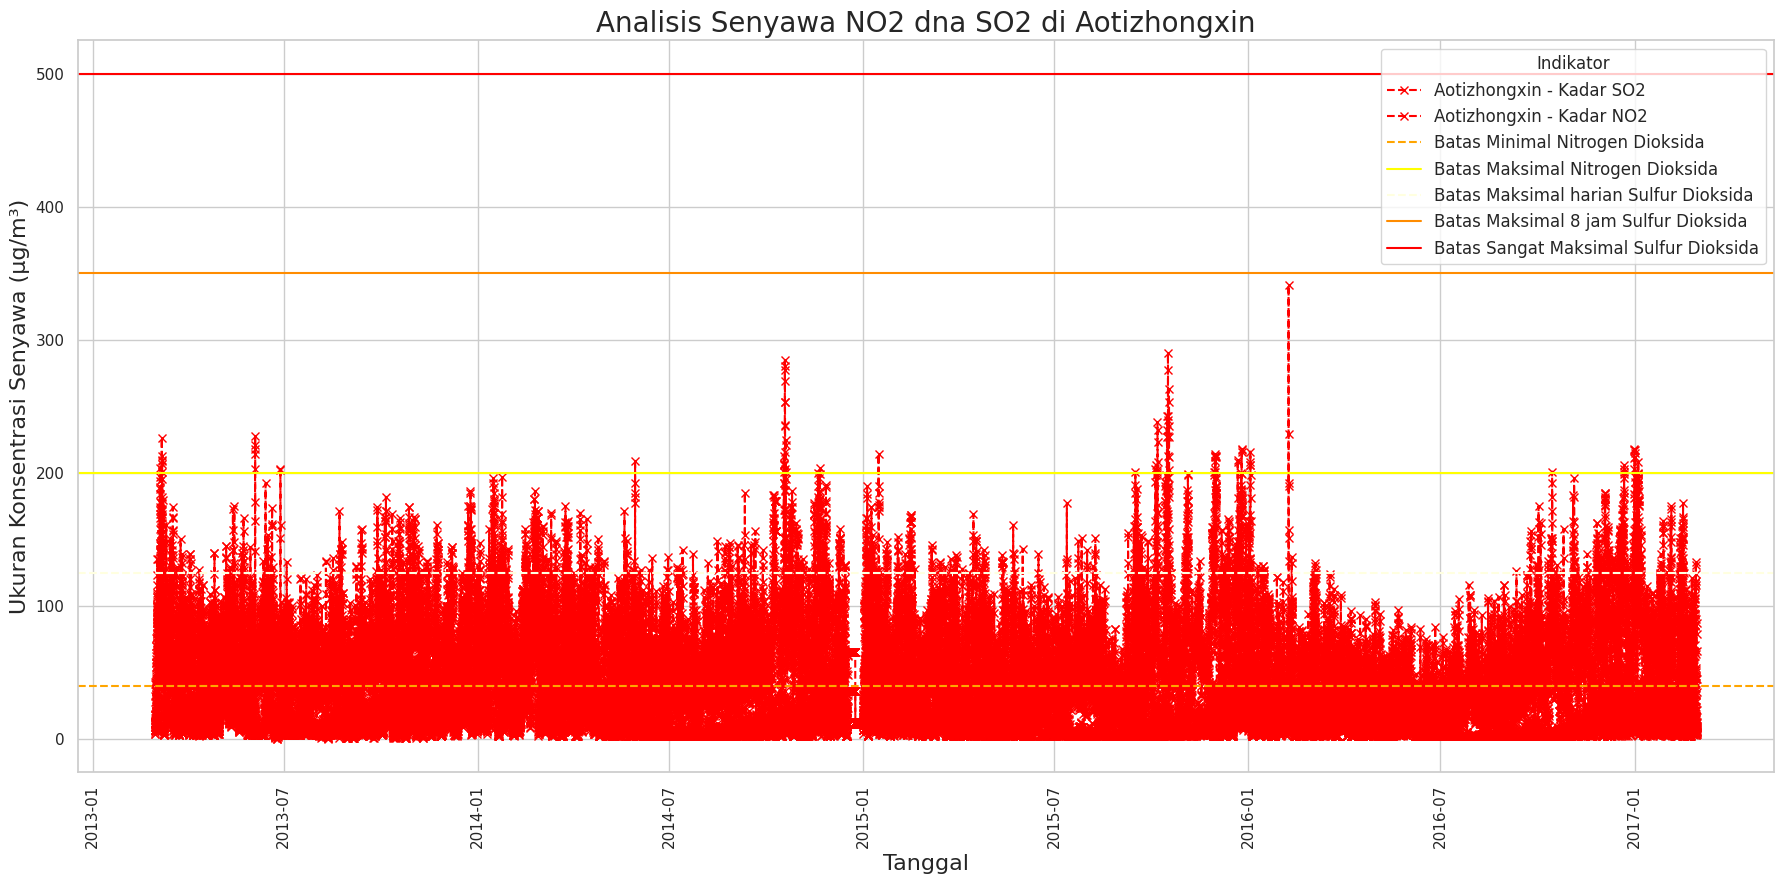

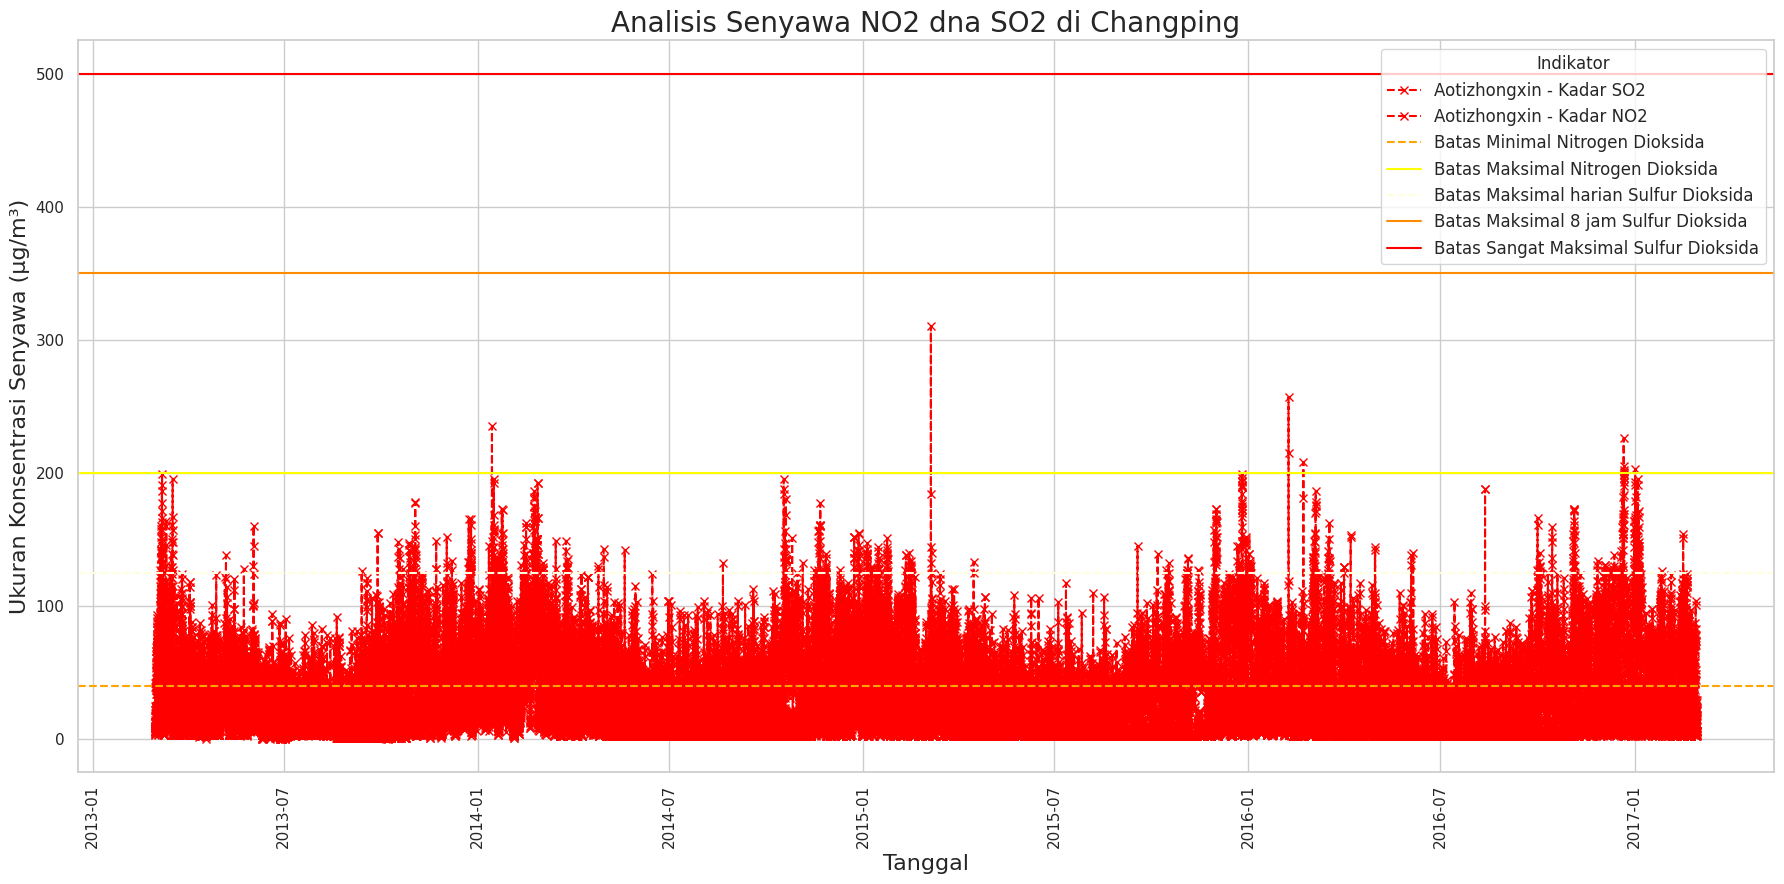

In [65]:
#grafik untuk analisis SO2 dan NO2
plot_compoundiii([dfaotizcomp], ['Aotizhongxin'], ['red'], 'Analisis Senyawa NO2 dna SO2 di Aotizhongxin')#Inspeksi senyawa NO2 dan SO2 di Aotizhongxin
plot_compoundiii([dfchangcomp], ['Aotizhongxin'], ['red'], 'Analisis Senyawa NO2 dna SO2 di Changping')#Inspeksi senyawa NO2 dan SO2 di Changping

#Resume inspeksi
##Keterangan (dari kiri ke kanan) :
### 1. Kasus nitrogen melebihi batas anual,
### 2.kasus nitrogen melebihi ambang maksimal, kasus sulfur di atas batas anual,
### 3.kasus sulfur di atas batas maksimal
- {'Aotizhongxin': [22210, 90, 34848, 0, 0]}
- {'Changping': [15641, 6, 34929, 0, 0]}
- {'Dingling': [7922, 1, 35047, 0, 0]}
- {'Dongsi': [20924, 37, 34890, 0, 0]}
- {'Guanyuan': [21804, 55, 34842, 0, 0]}
- {'Gucheng': [20796, 65, 34906, 24, 0]}
- {'Huairou': [10490, 3, 34951, 0, 0]}
- {'Nonzhanguan': [21294, 59, 34821, 0, 0]}
- {'Shunyi': [16058, 9, 34971, 0, 0]}
- {'Wanliu': [24745, 129, 34867, 0, 0]}
- {'Wanshouxigong': [20525, 55, 34832, 1, 0]}

**Informasi (insight) di bagian pemeriksaan senyawa NO2 dan SO2:**
##a. Inspeksi Senaywa SO2
- a. Kota Wanahouxigong adalah satu dari dua kota yang pernah mengalami kasus kadar sulfur dioksida di atas batas anual (nilainya "jauh" lebih rendah daripada kasus di Gucheng)
- b. Semua kota belum memiliki kasus sulfur dioksida melewati batas maksimal
- c. Kota Gucheng memiliki kasus kadar SO2 melewati anual paling tinggi
##b. Inspeksi Senyawa NO2
-a. Kota Dingling adalah satu-satunya kota dengan satu kasus nitrogen dioksida melewati batas maksimal yang dibolehkan, kota ini adalah satu dari empat kota dengan kasus dibawah sepuluh untuk kelebihan kadar nitrogen dioksida yang melewati batas maksimal.
-b. Mayoritas kasus untuk inspeksi senyawa NO2/ nitrogen dioksida adalah 'melewati batas anual'
-c. Dari empat kota dengan kasus nitrogen dioksida melewati batas maksimal yang dibolehkan, Kota Wanliu adalah kota dengan nilai paling tinggi

## Analisis Lanjutan (Opsional)

In [70]:
#Persiapan fungsi untuk analisis fisika
phsao = {'datetime': dfaotizhongxin['datetime'],'tekanan': dfaotizhongxin['PRES'],'suhu': dfaotizhongxin['TEMP'],
         'kelembapan': dfaotizhongxin['DEWP'],'kecepatan angin': dfaotizhongxin['WSPM']} #di Aotizhongxin
phschang = {'datetime': dfchangping['datetime'],'tekanan': dfchangping['PRES'],'suhu': dfchangping['TEMP'],'kelembapan': dfchangping['DEWP'],'kecepatan angin': dfchangping['WSPM']} #di Changping
phsding = {'datetime': dfdingling['datetime'],'tekanan': dfdingling['PRES'], 'suhu': dfdingling['TEMP'],'kelembapan': dfdingling['DEWP'],'kecepatan angin': dfdingling['WSPM']}
phsdong = {'datetime': dfdongsi['datetime'],'tekanan': dfdongsi['PRES'], 'suhu': dfdongsi['TEMP'],'kelembapan': dfdongsi['DEWP'],'kecepatan angin': dfdongsi['WSPM']} #di Dongsi
phsgua = {'datetime': dfguanyuan['datetime'],'tekanan': dfguanyuan['PRES'], 'suhu': dfguanyuan['TEMP'],'kelembapan': dfguanyuan['DEWP'],'kecepatan angin': dfguanyuan['WSPM']} #di Guanyuan
phsguc = {'datetime': dfgucheng['datetime'],'tekanan': dfgucheng['PRES'], 'suhu': dfgucheng['TEMP'],'kelembapan': dfgucheng['DEWP'],'kecepatan angin': dfgucheng['WSPM']} #di Gucheng
phshua = {'datetime': dfhuairou['datetime'],'tekanan': dfhuairou['PRES'], 'suhu': dfhuairou['TEMP'],'kelembapan': dfhuairou['DEWP'],'kecepatan angin': dfhuairou['WSPM']} #di Huairou
phsnon = {'datetime': dfnonzhanguan['datetime'],'tekanan': dfnonzhanguan['PRES'], 'suhu': dfnonzhanguan['TEMP'],
          'kelembapan': dfnonzhanguan['DEWP'],'kecepatan angin': dfnonzhanguan['NO2']} #di Nonzhanguan
phsshun = {'datetime': dfshunyi['datetime'],'tekanan': dfshunyi['PRES'], 'suhu': dfshunyi['TEMP'],'kelembapan': dfshunyi['DEWP'],'kecepatan angin': dfshunyi['WSPM']} #di Shunyi
phstian = {'datetime': dftiantan['datetime'],'tekanan': dftiantan['PRES'],'suhu': dftiantan['TEMP'],'kelembapan': dftiantan['DEWP'],'kecepatan angin': dftiantan['WSPM']} #di Tiantan
phswan = {'datetime': dfwanliu['datetime'],'tekanan': dfwanliu['PRES'],'suhu': dfwanliu['TEMP'],'kelembapan': dfwanliu['DEWP'],'kecepatan angin': dfwanliu['WSPM']} #di Wanliu
phswx = {'datetime': dfwanshouxigong['datetime'],'tekanan': dfwanshouxigong['PRES'],'suhu': dfwanshouxigong['TEMP'],
          'kelembapan': dfwanshouxigong['DEWP'],'kecepatan angin': dfwanshouxigong['WSPM']} #di Wanshouxigong
#ke Analisis suhu

In [77]:
#konversi ke dataframew
dfphsao = pd.DataFrame(phsao)
dfphschang = pd.DataFrame(phschang)
dfphsding = pd.DataFrame(phsding)
dfphsdong = pd.DataFrame(phsdong)
dfphsgua = pd.DataFrame(phsgua)
dfphsguc = pd.DataFrame(phsguc)
dfphshua = pd.DataFrame(phshua) #Huairou
dfphsnon = pd.DataFrame(phsnon) #Nonzhanguan
dfphsshun = pd.DataFrame(phsshun) #Shunyi
dfphstian = pd.DataFrame(phstian) #Tiantan
dfphswan = pd.DataFrame(phswan) #Wanliu
dfphswx = pd.DataFrame(phswx)


In [71]:
#Analisis lanjutan (Inspeksi suhu)
temprep = {
    'Aotizhongxin': tempao, 'Changping': tempch, 'Dingling' : tempdin,
    'Dongsi' : tempdon, 'Guanyuan': tempgua, 'Gucheng' : tempguc,
    'Huairou' : tempha, 'Nonzhanguan' : tempnon, 'Shunyi' : tempsh,
    'Tiantan': temptia, 'Wanliu' : tempwa, 'Wanshouxigong': tempwx
}
#iterasi untuk pemeriksaan data
for kota, data in temprep.items():
  tempres = {}
  negative = (data < 0).sum() #cek suhu negatif
  cold = ((data > 0) & (data <= 10)).sum()#Cek kasus suhu dingin [di bawah 10 derajat celsius]
  normal = ((data > 10) & (data <= 25)).sum()#Ceh kasus suhu normal
  hot = ((data > 25) & (data <= 35)).sum()#Cek kasus suhu panas [di atas 25 derajat celsius]
  goddamnhot = (data > 35).sum()#Cek kasus suhu sangat panas 'godamnhot' [di atas 35 derajat celsius]
  tempres[kota] = [negative, cold, normal, hot, goddamnhot]
  #Resume kasus suhu

# Resume data suhu
## Urutan baca data suhu: [sangat dingin, dingin, normal, panas, sangat panas]
- {'Aotizhongxin': [5316, 8663, 14249, 6505, 135]}
-{'Changping': [5129, 8746, 14340, 6494, 167]}
- {'Dingling': [5129, 8746, 14340, 6494, 167]}
- {'Dongsi': [5230, 8599, 14022, 6748, 133]}
- {'Guanyuan': [5316, 8663, 14249, 6505, 135]}
- {'Gucheng': [4900, 8809, 14299, 6716, 149]}
- {'Huairou': [6708, 8028, 14484, 5579, 73]}
- {'Nonzhanguan': [5230, 8599, 14022, 6748, 133]}
- {'Shunyi': [5693, 8437, 14229, 6379, 125]}
- {'Tiantan': [5230, 8599, 14020, 6750, 133]}
- {'Wanliu': [5423, 8677, 14464, 6174, 154]}
- {'Wanshouxigong': [5079, 8749, 14129, 6755, 126]}

**Bagian grafik suhu**

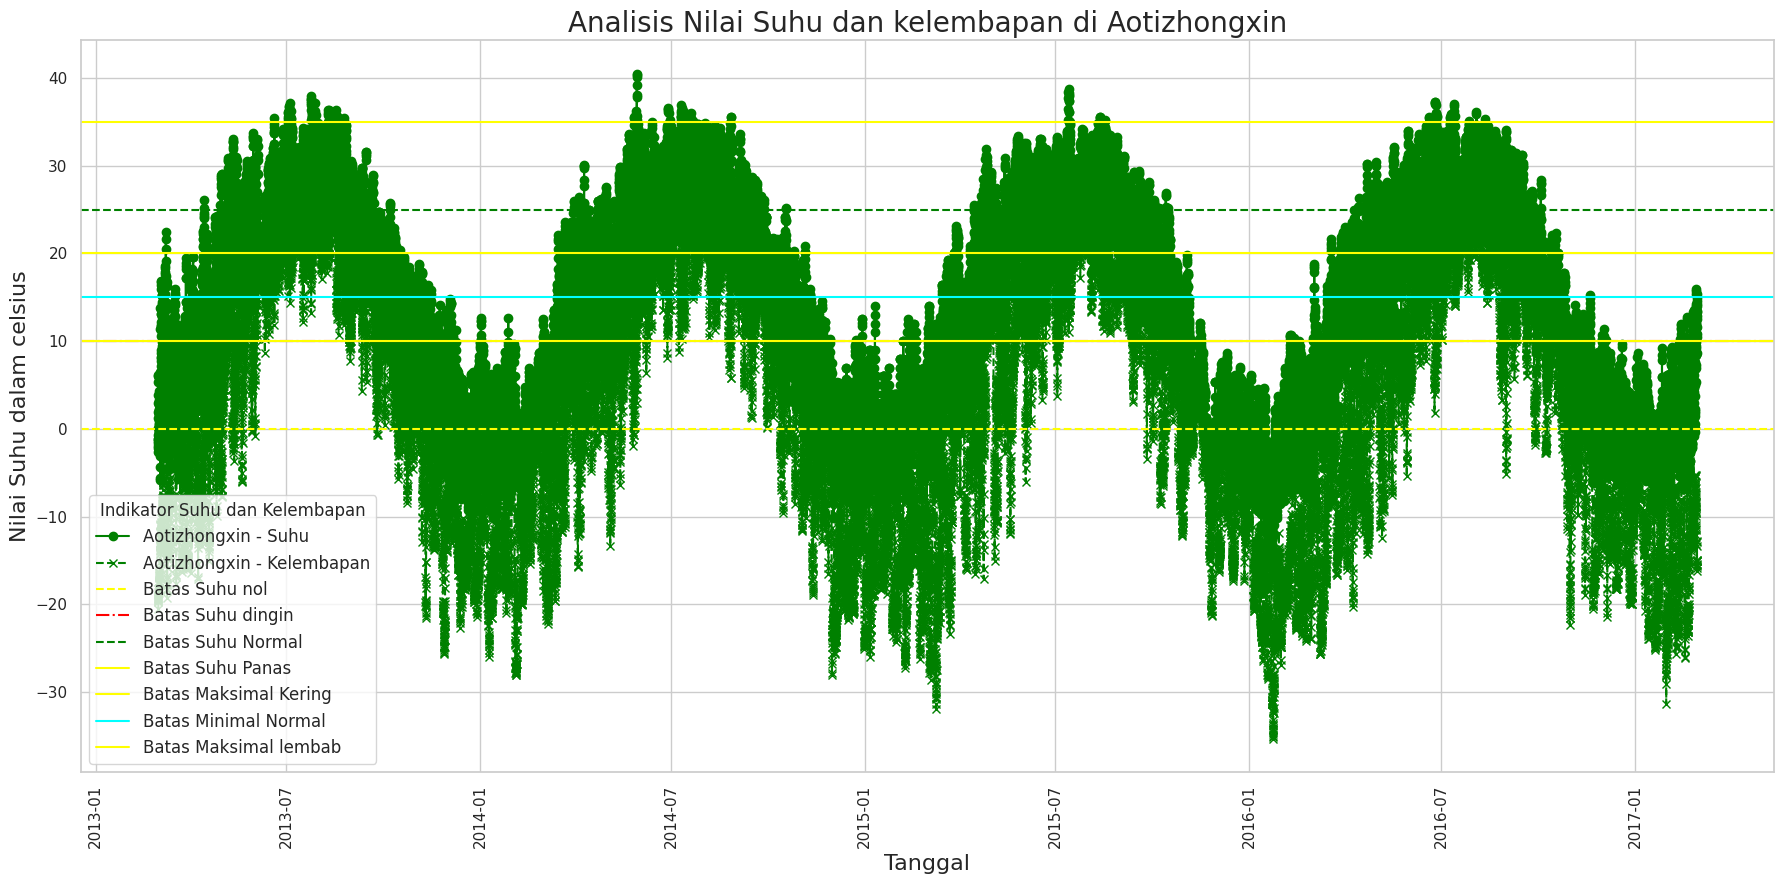

In [82]:
#Persiapan data suhu dan kelembapan
dah_analysis([dfaotizhongxin], ['Aotizhongxin'], ['green'], 'Analisis Nilai Suhu dan kelembapan di Aotizhongxin')


**Inspeksi Teknan**

In [67]:
#Analisis lanjutan (inspeksi tekanan)
atmospher = 1013.25
presrep = { 'Aotizhongxin': presao, 'Changping': presch, 'Dingling' : presdin,'Dongsi' : presdon, 'Guanyuan': presgua, 'Gucheng' : presguc, 'Huairou' : presha,
    'Nonzhanguan' : presnon, 'Shunyi' : presh, 'Tiantan': prestia,'Wanliu' : preswa, 'Wanshouxigong': preswx}

for kota,data in presrep.items():
  presres = {}
  low = (data < atmospher).sum() #Di bawah atmosfer
  normal = (data == atmospher).sum() #sama dengan atmosfer
  high = (data > atmospher).sum() #melewati atmosfer
  presres[kota] = [low, normal, high]
#Resume Kasus tekanan

**Resume kasus tekanan**
##Urutan baca : [rendah, normal, tinggi]
- {'Aotizhongxin': [19465, 0, 15599]}
- {'Changping': [23485, 1, 11578]}
- {'Dingling': [23485, 1, 11578]}
- {'Dongsi': [18656, 0, 16408]}
- {'Guanyuan': [19465, 0, 15599]}
- {'Gucheng': [22574, 1, 12489]}
- {'Huairou': [23992, 5, 11067]}
- {'Nonzhanguan': [18656, 0, 16408]}
- {'Shunyi': [18145, 1, 16918]}
- {'Tiantan': [18656, 0, 16408]}
- {'Wanliu': [20248, 0, 14816]}
- {'Wanshouxigong': [19874, 0, 15190]}

In [ ]:
#Bagian grafik tekanan
pres_analysis([dfaotizhongxin], ['Aotizhongxin'], ['green'], 'Analisis Nilai tekanan di Aotizhongxin') #di Aotizhongxin


**Inspeksi kelembapan dengan "nilai poinDew"**

In [73]:
#Inspeksi nilai dew
dewrep = {
   'Aotizhongxin': dewao, 'Changping': dewch, 'Dingling': dewdin,
   'Dongsi' : dewdon, 'Guanyuan': dewgua, 'Gucheng' : dewguc,
   'Huairou' : dewha, 'Nonzhanguan' : dewnon, 'Shunyi' : dewshu,
   'Tiantan': dewtia, 'Wanliu' : dewwa, 'Wanshouxigong': dewwx
}
[drl, comdr, humin] = [10, 15, 20]

#Iterasi nilai Dew
for kota, data in dewrep.items():
  dewres = {}
  desert = (data < drl).sum() #Kasus kering seperti gurun
  dryhum = ((data >= drl) & (data < comdr)).sum() #Kering tapi masih layak
  opthum = ((data >= comdr) & (data < humin)).sum() #Optimal
  vhum = (data >humin).sum() # sangat lembab
  dewres[kota] = [desert, dryhum, opthum, vhum]
#Resume nilai Dew

#Resume nilai Dew
##Urutan baca : [kering seperti gurun, kering tapi masih layak, optimal, sangat lembab]
- {'Aotizhongxin': [21533, 4096, 5449, 3877]}
- {'Changping': [22616, 4417, 5267, 2677]}
- {'Dingling': [22616, 4417, 5267, 2677]}
- {'Dongsi': [21940, 4281, 5366, 3402]}
- {'Guanyuan': [21533, 4096, 5449, 3877]}
- {'Gucheng': [21871, 4074, 5359, 3661]}
- {'Huairou': [21958, 4039, 5535, 3441]}
- {'Nonzhanguan': [21940, 4281, 5366, 3402]}
- {'Shunyi': [21931, 4189, 5587, 3280]}
- {'Tiantan': [21940, 4281, 5366, 3402]}
- {'Wanliu': [21383, 4046, 5586, 3946]}
- {'Wanshouxigong': [21819, 4190, 5472, 3481]}
"

**Informasi (Insight) Bagian suhu:**
- Kota Huairo memiliki total kasus sangat panas paling rendah sampai nilainya kurang dari 100
- Kota Dingling dan Changping berbagi posisi sebagai kota dengan kasus paling panas dengan nilai paling tinggi
- Jangkauan untuk kasus dengan suhu optimal adalah 14-15 ribu kasus

**Informasi (Insight) Bagian teknanan:**

- Mayoritas kota bertekanan di bawah tekanan atmosfer dan diatas itu
- Kota Huairou mempunyai nilai kasus tekanan lebih rendah paling banyak untuk kumpulan dataset.
- Kota Huairou mempunyai kasus perbedaan tekanan yang paling jauh (antara kasus tekanan di bawah atmosfer dengan tekanan di atas itu).
- Ada dua kota (Kota Changping dan Dingling memiliki beda kasus identik)

**Informasi (Insight) Bagian nilai dew:**
- Tingkat kelembapan untuk Mayoritas kota sangat kering "seperti gurun" (total kasus > 20 ribu)
- Semua kota memiliki total kasus di atas empat ribu untuk kelembapan yang layak (walaupun kering)

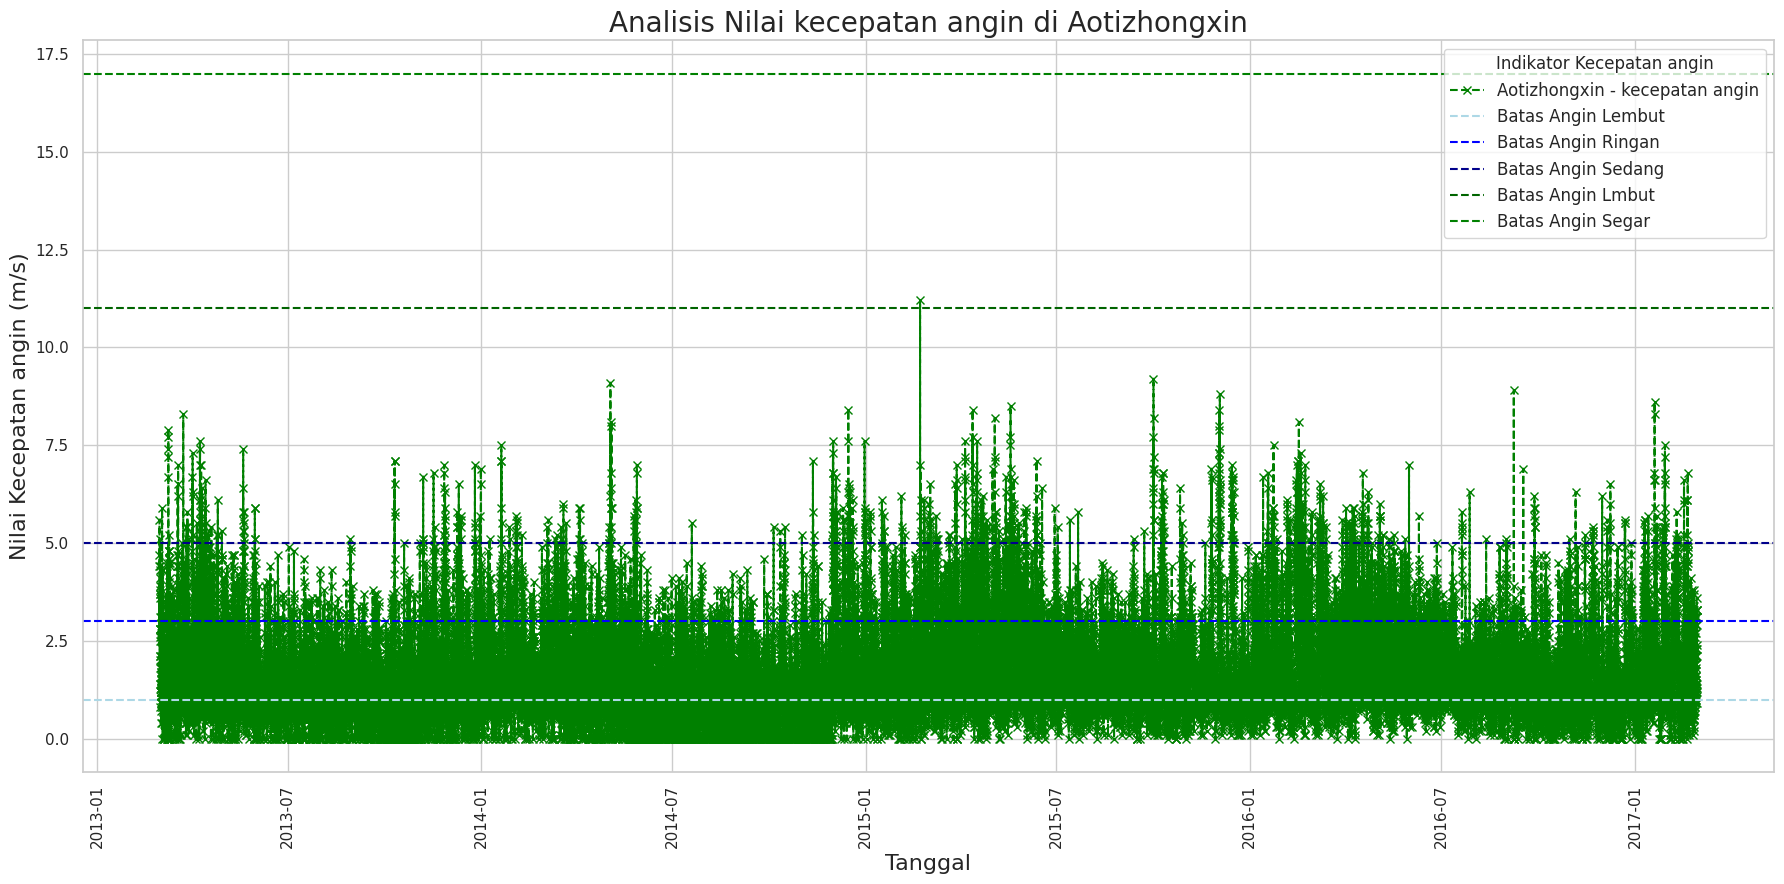

In [86]:
#inspeksi kecepatan angin
wspm_analysis([dfaotizhongxin], ['Aotizhongxin'], ['green'], 'Analisis Nilai kecepatan angin di Aotizhongxin') #di Aotizhongxin


In [ ]:
#Bagian 2


## Kesimpulan (Conclusion)

- Kesimpulan pertanyaan 1 : Kondisi suhu di dua belas kota menunjukkan variasi yang signifikan. Kota Dingling dan Changping mencatatkan jumlah kasus suhu ekstrem yang paling tinggi, dengan masing-masing mencapai lebih dari 15 ribu kasus. Sebaliknya, kota Huairou memiliki jumlah kasus suhu tinggi yang paling rendah, kurang dari 100 kasus. Hal ini menunjukkan bahwa sebagian besar kota mengalami fluktuasi suhu yang dapat mempengaruhi kualitas udara dan kesehatan masyarakat.
- Kesimpulan pertanyaan 2 : Pemeriksaan ukuran partikuler menunjukkan bahwa total kasus PM2.5 yang melampaui batas tahunan sudah mencapai lebih dari 20 ribu untuk semua kota. Kota Dingling memiliki jumlah kasus tertinggi di antara kota-kota lain, dengan lebih dari 30 ribu kasus PM2.5 yang melampaui ambang batas. Untuk PM10, total kasus juga melebihi 10 ribu, dengan Dingling menjadi satu-satunya kota yang mencatat lebih dari 20 ribu kasus. Ini menandakan bahwa polusi udara akibat partikulat sangat serius di beberapa daerah.
- Kesimpulan pertanyaan 3 : Pemeriksaan kadar gas berbahaya menunjukkan bahwa sebagian besar kota memiliki kadar karbon monoksida (CO) yang melebihi standar aman yang ditetapkan oleh pemerintah China. Khususnya, dua kota Huairou dan Dingling, mencatatkan kadar CO yang melebihi batas aman dengan nilai di bawah 500 mikrometer per meter kubik. Sementara itu, untuk kadar sulfur dioksida (SO2) dan nitrogen monoksida (NO), Dingling adalah satu-satunya kota dengan satu kasus melampaui batas maksimal.
- Kesimpulan pertanyaan 4 : Analisis kadar ozon menunjukkan bahwa semua kota memiliki total kadar ozon melebihi 1500 unit, dengan Nonzhanguan mencatatkan total kasus ozon tertinggi sebanyak 2600. Meskipun demikian, mayoritas kota mengalami masalah dengan kadar ozon rendah, terutama Wanliu yang mencatatkan lebih dari 20 ribu kasus ozon rendah. Hal ini mengindikasikan bahwa meskipun ada beberapa kota dengan kadar ozon tinggi, banyak daerah masih berjuang dengan kualitas udara yang buruk.
